In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 试查看两个文件，观察数据量

In [113]:
taxi_data_1 = pd.read_csv('./release/taxi_log_2008_by_id/1.txt')

In [114]:
taxi_data_1.shape

(587, 4)

In [115]:
taxi_data_2 = pd.read_csv('./release/taxi_log_2008_by_id/2.txt')

In [116]:
taxi_data_2.shape

(1673, 4)

## 统计数据不为空的文件

In [117]:
taxis = {}
for i in range(10357):
    try:
        taxi = pd.read_csv('./release/taxi_log_2008_by_id/{}.txt'.format(i+1))
        taxis[i+1] = taxi.shape[0]
    except:
        print(i+1,"无数据")

295 无数据
1089 无数据
1497 无数据
1947 无数据
2929 无数据
2945 无数据
3050 无数据
3160 无数据
3194 无数据
3950 无数据
5972 无数据
6030 无数据
6236 无数据
6322 无数据
6717 无数据
7583 无数据
8209 无数据
8424 无数据
9874 无数据
10115 无数据
10352 无数据


In [118]:
# 给文件大小排序并显示前100个
sorted(taxis.items(),key=lambda x : x[1],reverse=True)[:100]

[(6275, 154687),
 (3015, 145811),
 (3557, 121666),
 (3579, 101842),
 (366, 99493),
 (8179, 98630),
 (2560, 98463),
 (8717, 96401),
 (7146, 96256),
 (1131, 94938),
 (5860, 93822),
 (4798, 92135),
 (1277, 88054),
 (2669, 86028),
 (6665, 85750),
 (8662, 84273),
 (9109, 77553),
 (5075, 74482),
 (5099, 64916),
 (3781, 61465),
 (6656, 57425),
 (9754, 55286),
 (2237, 52938),
 (7105, 46565),
 (6211, 45037),
 (8554, 44999),
 (5070, 41458),
 (8126, 41313),
 (4177, 37809),
 (4112, 36772),
 (8696, 34643),
 (534, 34107),
 (7630, 31740),
 (7971, 30553),
 (950, 25978),
 (7173, 22720),
 (1509, 21365),
 (1563, 20248),
 (7430, 19998),
 (9207, 18870),
 (9949, 17196),
 (1059, 17106),
 (9946, 16829),
 (5071, 16552),
 (9578, 16541),
 (9945, 16506),
 (9948, 16375),
 (9944, 16234),
 (9950, 16121),
 (6464, 16010),
 (8801, 15836),
 (2780, 15656),
 (9952, 15564),
 (9579, 15471),
 (5072, 14956),
 (9580, 14246),
 (6818, 13098),
 (8291, 12623),
 (6831, 12613),
 (8463, 12504),
 (7195, 12349),
 (6942, 12058),
 (6810,

In [119]:
# 计算10000以上数据量文件的个数
sum([1 if taxis[i] > 10000 else 0 for i in taxis.keys()])

76

In [120]:
def thred(t):
    taxis={}
    nulltaxi=[]
    wuyongtaxi = {}
    for i in range(10357):
        try:
            taxi = pd.read_csv('./release/taxi_log_2008_by_id/{}.txt'.format(i+1))
            if taxi.shape[0] > t:
                taxis[i+1] = taxi.shape[0]
            else:
                wuyongtaxi[i+1] = taxi.shape[0]
        except:
            nulltaxi.append(i+1)
            print(i+1,"无数据")
    return taxis,nulltaxi,wuyongtaxi

In [121]:
taxiss,nulltaxi,wuyongtaxi = thred(10000)

295 无数据
1089 无数据
1497 无数据
1947 无数据
2929 无数据
2945 无数据
3050 无数据
3160 无数据
3194 无数据
3950 无数据
5972 无数据
6030 无数据
6236 无数据
6322 无数据
6717 无数据
7583 无数据
8209 无数据
8424 无数据
9874 无数据
10115 无数据
10352 无数据


In [122]:
#查看文件均值，中位数，众数
print(np.mean([i for i in taxis.values()]))
print(np.median([i for i in taxis.values()]))
counts = np.bincount([i for i in taxis.values()])
print(np.argmax(counts))
from scipy import stats
print(stats.mode([i for i in taxis.values()])[0][0])

1707.8800309597523
1398.0
4
4


In [123]:
# 选取数量最大的文件读取
taxi_data_6275 = pd.read_csv('./release/taxi_log_2008_by_id/6275.txt', names=['id','date','longitude','latitude'])

In [124]:
taxi_data_6275.head(50)

,id,date,longitude,latitude
0,6275,2008-02-02 13:30:44,116.36838,39.90484
1,6275,2008-02-02 13:30:45,116.36838,39.90484
2,6275,2008-02-02 13:30:46,116.36838,39.90484
3,6275,2008-02-02 13:30:47,116.36838,39.90484
4,6275,2008-02-02 13:30:48,116.36838,39.90484
5,6275,2008-02-02 13:30:49,116.36838,39.90484
6,6275,2008-02-02 13:30:50,116.36838,39.90484
7,6275,2008-02-02 13:30:51,116.36838,39.90484
8,6275,2008-02-02 13:30:54,116.36838,39.90484
9,6275,2008-02-02 13:30:56,116.36838,39.90484


## 观察经纬度分布情况

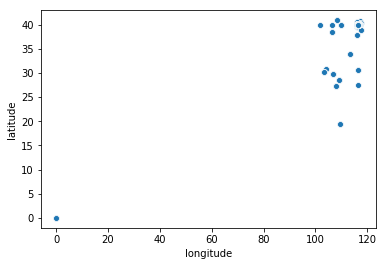

In [125]:
sns.scatterplot(x=taxi_data_6275['longitude'], y=taxi_data_6275['latitude'])

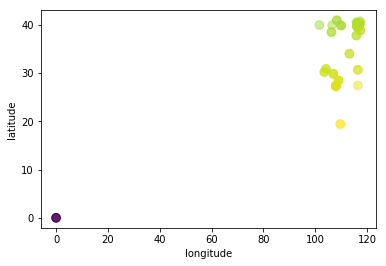

In [126]:
t = np.arctan2(taxi_data_6275['longitude'].values, taxi_data_6275['latitude'].values)
plt.scatter(taxi_data_6275['longitude'].values, taxi_data_6275['latitude'].values, s=75, c=t, alpha=0.5)
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

In [127]:
longitude = taxi_data_6275['longitude'].values
latitude = taxi_data_6275['latitude'].values

In [128]:
#统计异常点数目
sum([1 if (longitude[i]<10 and latitude[i]<10) else 0 for i in range(len(longitude))])

3

In [129]:
for i in range(len(longitude)):
    if (longitude[i]<10 and latitude[i]<10):
        print(i)
print(taxi_data_6275.iloc[56171])
print(taxi_data_6275.iloc[146296])
print(taxi_data_6275.iloc[146297])

56171
146296
146297
id                          6275
date         2008-02-04 15:42:15
longitude                      0
latitude                       0
Name: 56171, dtype: object
id                          6275
date         2008-02-08 14:34:53
longitude                      0
latitude                       0
Name: 146296, dtype: object
id                          6275
date         2008-02-08 14:34:53
longitude                      0
latitude                       0
Name: 146297, dtype: object


In [130]:
# 删除异常点
taxi_data_6275_without0 = taxi_data_6275.drop([56171,146296,146297],axis=0)
print(taxi_data_6275.shape[0],taxi_data_6275_without0.shape[0])

154688 154685


In [131]:
def tongjitu(taxi_data):
    t = np.arctan2(taxi_data['longitude'].values, taxi_data['latitude'].values)
    plt.scatter(taxi_data['longitude'].values, taxi_data['latitude'].values, s=75, c=t, alpha=0.5)
    plt.xlabel("longitude")
    plt.ylabel("latitude")
    plt.show()

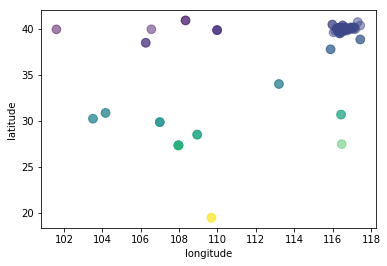

In [132]:
tongjitu(taxi_data_6275_without0)

In [133]:
sum([1 if (latitude[i]<25) else 0 for i in range(len(longitude))])

5

In [134]:
for i in range(len(longitude)):
    if (longitude[i]<110 and latitude[i]<25):
        print(i)

56171
58713
58714
146296
146297


In [135]:
print(taxi_data_6275.loc[58713])
print(taxi_data_6275.loc[58714])

id                          6275
date         2008-02-04 17:13:11
longitude                109.684
latitude                 19.4323
Name: 58713, dtype: object
id                          6275
date         2008-02-04 17:13:11
longitude                109.684
latitude                 19.4323
Name: 58714, dtype: object


In [136]:
print(taxi_data_6275.iloc[58711])
print(taxi_data_6275.iloc[58712])
print(taxi_data_6275.iloc[58713])
print(taxi_data_6275.iloc[58714])
print(taxi_data_6275.iloc[58715])
print(taxi_data_6275.iloc[58716])

id                          6275
date         2008-02-04 17:13:08
longitude                116.412
latitude                 39.9008
Name: 58711, dtype: object
id                          6275
date         2008-02-04 17:13:09
longitude                116.412
latitude                 39.9007
Name: 58712, dtype: object
id                          6275
date         2008-02-04 17:13:11
longitude                109.684
latitude                 19.4323
Name: 58713, dtype: object
id                          6275
date         2008-02-04 17:13:11
longitude                109.684
latitude                 19.4323
Name: 58714, dtype: object
id                          6275
date         2008-02-04 17:13:11
longitude                116.412
latitude                 39.9006
Name: 58715, dtype: object
id                          6275
date         2008-02-04 17:13:13
longitude                116.412
latitude                 39.9006
Name: 58716, dtype: object


In [137]:
print("疑似异常点数目",sum([1 if (longitude[i]<116 and latitude[i]<39) else 0 for i in range(len(longitude))])-3)

疑似异常点数目 24


In [138]:
t1 = taxi_data_6275_without0[taxi_data_6275_without0.longitude<116]
t1 = t1[t1.latitude<39]

In [139]:
t1

,id,date,longitude,latitude
432,6275,2008-02-02 13:39:55,104.17062,30.82935
433,6275,2008-02-02 13:39:55,104.17062,30.82935
28996,6275,2008-02-03 15:36:22,106.99473,29.82750
28997,6275,2008-02-03 15:36:22,106.99473,29.82750
28998,6275,2008-02-03 15:36:22,106.99473,29.82750
52716,6275,2008-02-04 13:42:44,107.96629,27.30380
52717,6275,2008-02-04 13:42:44,107.96629,27.30380
58713,6275,2008-02-04 17:13:11,109.68429,19.43226
58714,6275,2008-02-04 17:13:11,109.68429,19.43226
64380,6275,2008-02-04 19:58:13,107.96631,27.30383


In [140]:
yisi = t1.index

In [141]:
tdate = pd.to_datetime(taxi_data_6275_without0.date)

In [142]:
print(tdate.shape)
tdate.head()

(154685,)


0   2008-02-02 13:30:44
1   2008-02-02 13:30:45
2   2008-02-02 13:30:46
3   2008-02-02 13:30:47
4   2008-02-02 13:30:48
Name: date, dtype: datetime64[ns]

In [143]:
tddiff = tdate.diff()
print(tddiff.shape)

(154685,)


In [144]:
tddiff.head()

0        NaT
1   00:00:01
2   00:00:01
3   00:00:01
4   00:00:01
Name: date, dtype: timedelta64[ns]

In [145]:
tarray = tddiff.values
tarray[0]=0
tddiff = pd.DataFrame(tarray,columns=['date_diff'])
print(tddiff.shape)
tddiff.head()

(154685, 1)


,date_diff
0,00:00:00
1,00:00:01
2,00:00:01
3,00:00:01
4,00:00:01


In [147]:
taxi_data_6275_without0['date_diff'] = tddiff.date_diff.values

In [149]:
taxi_data_6275_without0.tail()

,id,date,longitude,latitude,date_diff
154683,6275,2008-02-08 17:38:53,116.42720,39.93774,00:00:01
154684,6275,2008-02-08 17:38:54,116.42722,39.93763,00:00:01
154685,6275,2008-02-08 17:39:05,116.42715,39.93636,00:00:11
154686,6275,2008-02-08 17:39:07,116.42709,39.93614,00:00:02
154687,6275,2008-02-08 17:39:15,116.42706,39.93517,00:00:08


In [150]:
sum(taxi_data_6275_without0.date_diff.isnull())

0

In [151]:
taxi_data_6275_without0.loc[1:].head()

,id,date,longitude,latitude,date_diff
1,6275,2008-02-02 13:30:45,116.36838,39.90484,00:00:01
2,6275,2008-02-02 13:30:46,116.36838,39.90484,00:00:01
3,6275,2008-02-02 13:30:47,116.36838,39.90484,00:00:01
4,6275,2008-02-02 13:30:48,116.36838,39.90484,00:00:01
5,6275,2008-02-02 13:30:49,116.36838,39.90484,00:00:01


In [152]:
taxi_data_6275_without0_time0 = taxi_data_6275_without0.drop(taxi_data_6275_without0.loc[1:][taxi_data_6275_without0.loc[1:].date_diff.dt.total_seconds()==0].index, axis=0)

In [153]:
taxi_data_6275_without0_time0[taxi_data_6275_without0_time0.date_diff.dt.total_seconds()==0]

,id,date,longitude,latitude,date_diff
0,6275,2008-02-02 13:30:44,116.36838,39.90484,0 days


In [154]:
taxi_data_6275_without0_time0.shape

(148077, 5)

In [155]:
longitude_diff = taxi_data_6275_without0_time0.longitude.diff()
latitude_diff = taxi_data_6275_without0_time0.latitude.diff()

In [156]:
print(longitude_diff.shape)
longitude_diff.head()

(148077,)


0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
Name: longitude, dtype: float64

In [157]:
print(latitude_diff.shape)
latitude_diff.head()

(148077,)


0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
Name: latitude, dtype: float64

In [158]:
latitude_diff.loc[0]=0
longitude_diff.loc[0]=0

In [159]:
print(latitude_diff.shape)
latitude_diff.tail()

(148077,)


154683   -0.00011
154684   -0.00011
154685   -0.00127
154686   -0.00022
154687   -0.00097
Name: latitude, dtype: float64

In [160]:
longitude_diff_10000 = longitude_diff*10000
latitude_diff_10000 = latitude_diff*10000

In [161]:
dis = np.sqrt(latitude_diff_10000**2+longitude_diff_10000**2)

In [162]:
print(dis.shape)
dis.head()

(148077,)


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [163]:
diatance = pd.DataFrame(dis.values,columns=['dis'])
print(diatance.shape)

(148077, 1)


In [165]:
taxi_data_6275_without0_time0['dis'] = diatance.dis.values

In [171]:
taxi_data_6275_without0_time0.tail()

,id,date,longitude,latitude,date_diff,dis
154683,6275,2008-02-08 17:38:53,116.42720,39.93774,00:00:01,1.118034
154684,6275,2008-02-08 17:38:54,116.42722,39.93763,00:00:01,1.118034
154685,6275,2008-02-08 17:39:05,116.42715,39.93636,00:00:11,12.719277
154686,6275,2008-02-08 17:39:07,116.42709,39.93614,00:00:02,2.280351
154687,6275,2008-02-08 17:39:15,116.42706,39.93517,00:00:08,9.704638


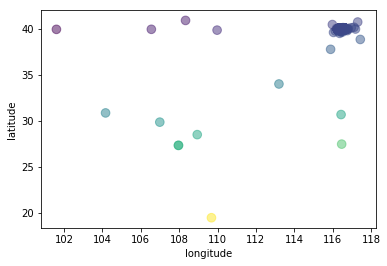

In [167]:
tongjitu(taxi_data_6275_without0_time0)
#由此图可看出之前统计的两个疑似是异常

In [168]:
diatance.tail()

,dis
148072,1.118034
148073,1.118034
148074,12.719277
148075,2.280351
148076,9.704638


In [172]:
sum(taxi_data_6275_without0_time0.dis.isnull())

0

In [173]:
b = pd.DataFrame(taxi_data_6275_without0_time0['date_diff'].value_counts()) # 统计每个唯一值出现了多少次
b

,date_diff
00:00:01,120991
00:00:02,14067
00:00:03,5321
00:00:04,2334
00:00:05,1341
00:00:06,934
00:00:07,578
00:00:08,370
00:00:11,323
00:00:09,259


In [175]:
c = pd.DataFrame(taxi_data_6275_without0_time0['dis'].value_counts()) # 统计每个唯一值出现了多少次
c

,dis
0.000000,50910
0.500000,2227
0.100000,2126
1.000000,1736
0.800000,1527
0.700000,1335
0.700000,1243
0.900000,1195
0.400000,1181
1.200000,1168


In [176]:
sum(c.dis==1)

4341

In [178]:
taxi_v = (taxi_data_6275_without0_time0.dis)/(taxi_data_6275_without0_time0.date_diff.dt.total_seconds())

In [181]:
print(taxi_v.shape)
taxi_v.tail()

(148077,)


154683    1.118034
154684    1.118034
154685    1.156298
154686    1.140175
154687    1.213080
dtype: float64

In [182]:
taxi_v.head()

0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [184]:
taxi_v.loc[0]=0
taxi_v.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

In [185]:
taxi_data_6275_without0_time0['v'] = taxi_v.values

In [186]:
taxi_data_6275_without0_time0.tail()

,id,date,longitude,latitude,date_diff,dis,v
154683,6275,2008-02-08 17:38:53,116.42720,39.93774,00:00:01,1.118034,1.118034
154684,6275,2008-02-08 17:38:54,116.42722,39.93763,00:00:01,1.118034,1.118034
154685,6275,2008-02-08 17:39:05,116.42715,39.93636,00:00:11,12.719277,1.156298
154686,6275,2008-02-08 17:39:07,116.42709,39.93614,00:00:02,2.280351,1.140175
154687,6275,2008-02-08 17:39:15,116.42706,39.93517,00:00:08,9.704638,1.213080


In [187]:
sum(taxi_data_6275_without0_time0.v.isnull())

0

In [188]:
sum(taxi_data_6275_without0_time0.v==float("inf"))

0

In [189]:
taxi_data_6275_without0_time0 = taxi_data_6275_without0_time0.drop(["id"],axis=1)

In [190]:
taxi_data_6275_without0_time0.head()

,date,longitude,latitude,date_diff,dis,v
0,2008-02-02 13:30:44,116.36838,39.90484,00:00:00,0.0,0.0
1,2008-02-02 13:30:45,116.36838,39.90484,00:00:01,0.0,0.0
2,2008-02-02 13:30:46,116.36838,39.90484,00:00:01,0.0,0.0
3,2008-02-02 13:30:47,116.36838,39.90484,00:00:01,0.0,0.0
4,2008-02-02 13:30:48,116.36838,39.90484,00:00:01,0.0,0.0


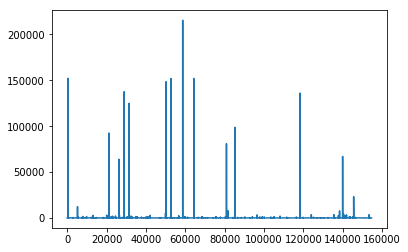

In [191]:
ax = sns.lineplot(data=taxi_data_6275_without0_time0['dis'])
plt.show()

In [192]:
taxi_data_6275_without0_time0[taxi_data_6275_without0_time0['dis'].values > 40000]

,date,longitude,latitude,date_diff,dis,v
432,2008-02-02 13:39:55,104.17062,30.82935,00:00:01,152099.749589,152099.749589
434,2008-02-02 13:39:56,116.37177,39.91094,00:00:01,152099.749589,152099.749589
21232,2008-02-03 12:07:47,116.43496,30.65231,00:00:01,92541.800000,92541.800000
21234,2008-02-03 12:07:48,116.43496,39.90649,00:00:01,92541.800000,92541.800000
26266,2008-02-03 14:12:11,109.97869,39.83294,00:00:01,63953.188340,63953.188340
26269,2008-02-03 14:12:15,116.37212,39.94766,00:00:04,63944.591517,15986.147879
28996,2008-02-03 15:36:22,106.99473,29.82750,00:00:03,137600.779177,45866.926392
29001,2008-02-03 15:36:24,116.33791,39.92924,00:00:02,137600.931516,68800.465758
31389,2008-02-03 17:11:29,116.46645,27.43772,00:00:02,124921.300000,62460.650000
31390,2008-02-03 17:12:00,116.46532,39.92935,00:00:31,124916.300511,4029.558081


In [206]:
taxi_data_6275_without0_time0 = taxi_data_6275_without0_time0.drop([432, 21232, 26266, 28996, 31389, 50247, 52716, 58713, 64380, 80956, 85342, 118449, 139991])

In [207]:
taxi_data_6275_without0_time0.shape

(148064, 6)

In [208]:
taxi_data_6275_without0_time0[taxi_data_6275_without0_time0['dis'].values > 40000]

,date,longitude,latitude,date_diff,dis,v
434,2008-02-02 13:39:56,116.37177,39.91094,00:00:01,152099.749589,152099.749589
21234,2008-02-03 12:07:48,116.43496,39.90649,00:00:01,92541.800000,92541.800000
26269,2008-02-03 14:12:15,116.37212,39.94766,00:00:04,63944.591517,15986.147879
29001,2008-02-03 15:36:24,116.33791,39.92924,00:00:02,137600.931516,68800.465758
31390,2008-02-03 17:12:00,116.46532,39.92935,00:00:31,124916.300511,4029.558081
50248,2008-02-04 12:36:25,116.45543,39.91763,00:00:02,148442.900000,74221.450000
52718,2008-02-04 13:42:45,116.45609,39.90419,00:00:01,151936.345945,151936.345945
58716,2008-02-04 17:13:13,116.41207,39.90058,00:00:02,215456.526323,107728.263161
64386,2008-02-04 19:58:14,116.48250,39.88738,00:00:01,151944.471014,151944.471014
80958,2008-02-05 15:22:33,116.37560,39.95013,00:00:02,80943.625522,40471.812761


In [267]:
def renew(taxi_data):
    tdate = pd.to_datetime(taxi_data.date)
    tdif = tdate.diff()
    tarray = tdif.values
    tarray[0]=0
    tdif = pd.DataFrame(tarray,columns=['date_diff'])
    
    long_dif = taxi_data['longitude'].diff()
    lat_dif = taxi_data['latitude'].diff()
    long_dif.loc[0]=0
    lat_dif.loc[0]=0
    lat_dif = lat_dif*10000 * 11.1
    long_dif = long_dif*10000 * 8.5
    ndis = np.sqrt(long_dif**2+lat_dif**2)
    diat = pd.DataFrame(ndis.values,columns=['dis'])
    n_v = (diat.dis)/(tdif.date_diff.dt.total_seconds())
    n_v.loc[0]=0
    return tdif, diat, n_v

In [268]:
tdif, ndis, n_v = renew(taxi_data_6275_without0_time0.copy())

In [269]:
taxi_data_6275_without0_time0.date_diff = tdif.date_diff.values
taxi_data_6275_without0_time0.dis = ndis.dis.values
taxi_data_6275_without0_time0.v = n_v.values


In [270]:
taxi_data_6275_without0_time0.tail()

,date,longitude,latitude,date_diff,dis,v
154683,2008-02-08 17:38:53,116.42720,39.93774,00:00:01,12.327778,12.327778
154684,2008-02-08 17:38:54,116.42722,39.93763,00:00:01,12.327778,12.327778
154685,2008-02-08 17:39:05,116.42715,39.93636,00:00:11,141.095512,12.826865
154686,2008-02-08 17:39:07,116.42709,39.93614,00:00:02,24.946872,12.473436
154687,2008-02-08 17:39:15,116.42706,39.93517,00:00:08,107.700192,13.462524


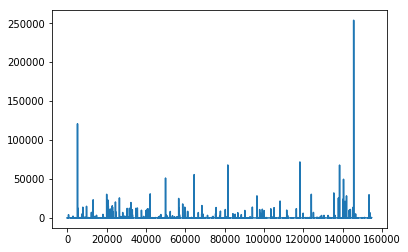

In [271]:
ax = sns.lineplot(data=taxi_data_6275_without0_time0['dis'])
plt.show()

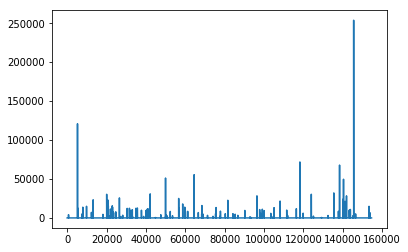

In [273]:
ax = sns.lineplot(data=taxi_data_6275_without0_time0['v'])
plt.show()

In [287]:
taxi_data_6275_without0_time0[taxi_data_6275_without0_time0['v'].values > 45]

,date,longitude,latitude,date_diff,dis,v
689,2008-02-02 13:44:33,116.42045,39.91094,00:00:01,4137.800000,4137.800000
691,2008-02-02 13:44:34,116.37177,39.91094,00:00:01,4137.800000,4137.800000
5250,2008-02-02 17:12:00,117.30149,40.71406,00:00:01,120896.956091,120896.956091
5252,2008-02-02 17:12:01,116.42617,39.85565,00:00:01,120891.003151,120891.003151
5496,2008-02-02 17:17:54,116.41208,39.96787,00:00:02,12402.105762,6201.052881
5498,2008-02-02 17:17:55,116.41261,39.85613,00:00:01,12403.221814,12403.221814
7410,2008-02-02 18:24:58,116.49240,39.96265,00:00:01,4937.558820,4937.558820
7412,2008-02-02 18:25:00,116.45578,39.92830,00:00:02,4922.065259,2461.032629
7950,2008-02-02 18:39:57,116.33321,39.91685,00:00:02,13765.449477,6882.724738
7955,2008-02-02 18:39:58,116.49503,39.92175,00:00:01,13765.449477,13765.449477


In [295]:
taxi_data_6275_without0_time0.loc[153886]
print(taxi_data_6275_without0_time0.loc[153881:153885])
print(taxi_data_6275_without0_time0.loc[153882])

                       date  longitude  latitude date_diff         dis  \
153881  2008-02-08 17:17:03  116.36740  39.95694  00:00:03   45.539632   
153882  2008-02-08 17:17:07  116.36673  39.95686  00:00:04   57.638155   
153883  2008-02-08 17:17:42  116.36470  39.95919  00:00:35  310.906705   
153884  2008-02-08 17:17:44  116.36470  39.95933  00:00:02   15.540000   
153885  2008-02-08 17:17:45  116.36469  39.95940  00:00:01    7.816355   

                v  
153881  15.179877  
153882  14.409539  
153883   8.883049  
153884   7.770000  
153885   7.816355  
date         2008-02-08 17:17:07
longitude                116.367
latitude                 39.9569
date_diff        0 days 00:00:04
dis                      57.6382
v                        14.4095
Name: 153882, dtype: object


In [300]:
for i in taxi_data_6275_without0_time0[taxi_data_6275_without0_time0['v'].values > 45].index:
    print(i,end=" ")
    

689 691 5250 5252 5496 5498 7410 7412 7950 7955 7972 7974 9837 9838 12327 12332 13097 13099 13209 13210 18183 18185 20077 20079 20661 20664 20903 20905 21391 21392 22009 22011 22922 22926 22930 22932 23046 23047 23272 23273 23276 24523 24527 24528 24530 24709 24711 24730 24732 24736 24738 24902 24904 26536 26538 26547 26548 26550 26896 27259 27261 28229 28231 30495 30497 31635 31636 32396 32397 33102 33104 33173 33175 34938 34940 35665 35666 37748 37749 38845 38848 40018 40020 40274 40276 40713 40714 41063 41067 42198 42201 44843 44845 47586 47588 47624 47626 49906 49908 49993 49995 50423 50425 50860 50862 52401 52403 53529 53531 56676 56678 56925 56927 58708 58712 59767 59770 60072 60075 61255 61257 64359 64361 64386 64390 64548 64550 64551 64553 66645 66649 68364 68365 68484 68486 69024 69026 71325 71327 74123 74124 75432 75434 75673 75675 77608 77610 77890 77891 80358 80360 80362 80363 80365 81637 81639 81641 81642 84241 84244 84930 84934 85391 85393 86723 86725 90288 90290 92939 92

In [310]:
def show(ind1,ind2):
    print(taxi_data_6275_without0_time0.loc[ind1:ind2])
153414 153416 153887 153889 

In [365]:
show(145602, 145608)

                       date  longitude  latitude date_diff            dis  \
145602  2008-02-08 14:20:32  116.41125  39.99732  00:00:01       6.714023   
145603  2008-02-08 14:20:33  116.41126  39.99738  00:00:01       6.714023   
145604  2008-02-08 14:20:34  115.88970  37.74600  00:00:01  253805.001521   
145606  2008-02-08 14:20:35  117.43542  38.81956  00:00:01  177377.193879   
145608  2008-02-08 14:20:37  116.41131  39.99769  00:00:02  157095.568949   

                    v  
145602       6.714023  
145603       6.714023  
145604  253805.001521  
145606  177377.193879  
145608   78547.784475  


In [366]:
del1 = [689,5250,5496,7410,7950,7972,9837,12327,13097,13209,18183,20077,20661,20903,21391,22009,22922,22930,23046,23272,23273,24523,24528
       ,24709,24730,24736,24902, 26536,26547,26548,26896,27259,28229,30495,31635,32396,33102,33173,34938,35665,37748,38845,40018,40274
       ,40713,41063,42198,44843,47586,47624,49906,49993,50423,50860,52401,53529,56676,56925,58708,59767,60072,61255,64359,64386,64548
       ,64548,64551,66645,68364,68484,69024,71325,74123,75432,75673,77608,77890,80358,80360,80363,81637,81641,84241,84930,85391,86723,
       90288,92939,93559,96447,97832,98428,99187,99194,100116,103486,104554,105145,108194,111575,112046,116470,118282,119921,124078,
       125159,129286,132580,135519,137852,138437,140182,140425,140446,141247,141965,143359,143717,143926,145194,145604,145606,146587,
       153290,153414,153887]

In [367]:
taxi_data_6275_without0_time0 = taxi_data_6275_without0_time0.drop(del1)

In [368]:
len(del1)

126

In [369]:
taxi_data_6275_without0_time0.shape

(147939, 6)

In [370]:
tdif, ndis, n_v = renew(taxi_data_6275_without0_time0.copy())

In [372]:
taxi_data_6275_without0_time0.date_diff = tdif.date_diff.values
taxi_data_6275_without0_time0.dis = ndis.dis.values
taxi_data_6275_without0_time0.v = n_v.values
taxi_data_6275_without0_time0.tail()

,date,longitude,latitude,date_diff,dis,v
154683,2008-02-08 17:38:53,116.42720,39.93774,00:00:01,12.327778,12.327778
154684,2008-02-08 17:38:54,116.42722,39.93763,00:00:01,12.327778,12.327778
154685,2008-02-08 17:39:05,116.42715,39.93636,00:00:11,141.095512,12.826865
154686,2008-02-08 17:39:07,116.42709,39.93614,00:00:02,24.946872,12.473436
154687,2008-02-08 17:39:15,116.42706,39.93517,00:00:08,107.700192,13.462524


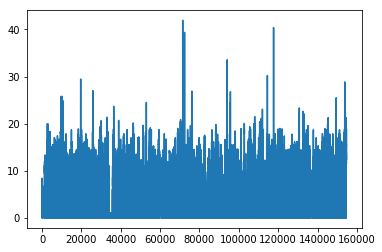

In [373]:
ax = sns.lineplot(data=taxi_data_6275_without0_time0['v'])
plt.show()

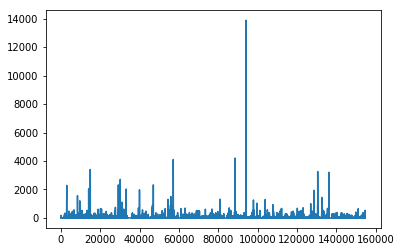

In [376]:
ax = sns.lineplot(data=taxi_data_6275_without0_time0['dis'])
plt.show()

In [374]:
def draw_trend(timeseries):
    timeseries.plot(color='blue', label='Original')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

In [395]:
taxi_data_6275_without0_time0.head()
#t_series=taxi_data_6275_without0_time0['dis']

,date,longitude,latitude,date_diff,dis,v
0,2008-02-02 13:30:44,116.36838,39.90484,00:00:00,0.0,0.0
1,2008-02-02 13:30:45,116.36838,39.90484,00:00:01,0.0,0.0
2,2008-02-02 13:30:46,116.36838,39.90484,00:00:01,0.0,0.0
3,2008-02-02 13:30:47,116.36838,39.90484,00:00:01,0.0,0.0
4,2008-02-02 13:30:48,116.36838,39.90484,00:00:01,0.0,0.0


In [410]:
t_series=taxi_data_6275_without0_time0['dis'].values

In [411]:
t_series[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
ttt = pd.DataFrame()

In [413]:
pdf = pd.to_datetime(taxi_data_6275_without0_time0.date.values,format='%Y-%m-%d %H:%M:%S')

In [417]:
ttt = pd.DataFrame(data=t_series, index=pdf, columns=['dis'])

In [418]:
ttt.head()

,dis
2008-02-02 13:30:44,0.0
2008-02-02 13:30:45,0.0
2008-02-02 13:30:46,0.0
2008-02-02 13:30:47,0.0
2008-02-02 13:30:48,0.0


In [419]:
t_series_D = ttt.resample('D').mean()

In [420]:
t_series_D

,dis
2008-02-02,10.765729
2008-02-03,8.889536
2008-02-04,8.418791
2008-02-05,8.676977
2008-02-06,9.466944
2008-02-07,10.782584
2008-02-08,9.219823


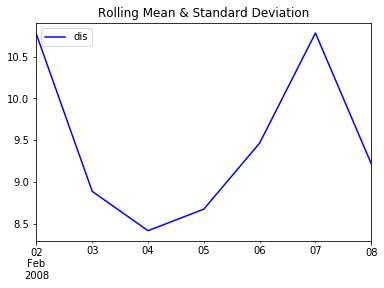

In [421]:
draw_trend(t_series_D)

In [422]:
t_series_T = ttt.resample('T').mean()

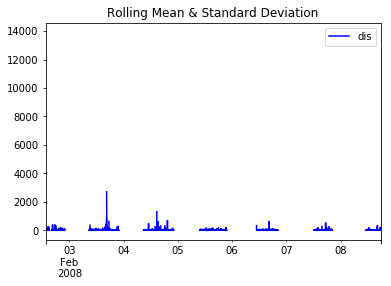

In [423]:
draw_trend(t_series_T)

In [306]:
help(pd.Series.resample)

Help on function resample in module pandas.core.generic:

resample(self, rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start', kind=None, loffset=None, limit=None, base=0, on=None, level=None)
    Resample time-series data.
    
    Convenience method for frequency conversion and resampling of time
    series. Object must have a datetime-like index (`DatetimeIndex`,
    `PeriodIndex`, or `TimedeltaIndex`), or pass datetime-like values
    to the `on` or `level` keyword.
    
    Parameters
    ----------
    rule : str
        The offset string or object representing target conversion.
    how : str
        Method for down/re-sampling, default to 'mean' for downsampling.
    
        .. deprecated:: 0.18.0
           The new syntax is ``.resample(...).mean()``, or
           ``.resample(...).apply(<func>)``
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Which axis to use for up- or down-sampling. For `Series` this
        will default to 0

In [426]:
sum(taxi_data_6275_without0_time0['dis'].isnull())

0

In [430]:
sum(t_series_T.dis.isnull())

4929

In [431]:
t_series_T_1 = t_series_T.dropna()

In [432]:
sum(t_series_T_1.dis.isnull())

0

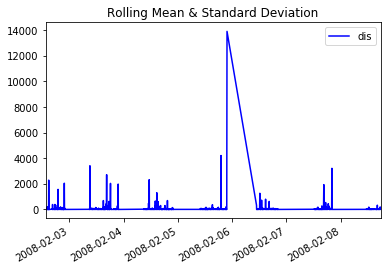

In [433]:
draw_trend(t_series_T_1)

In [434]:
sum(taxi_data_6275_without0_time0['dis']==0)

50941

In [435]:
sum(taxi_data_6275_without0_time0['dis']!=0)

96998

In [437]:
taxi_data_6275_without0_time0[taxi_data_6275_without0_time0['dis']>6000]

,date,longitude,latitude,date_diff,dis,v
94113,2008-02-05 21:44:38,116.41050,39.71880,00:06:54,13887.215099,33.543998
94115,2008-02-06 10:47:17,116.41033,39.84385,13:02:39,13880.557521,0.295589


In [438]:
taxi_data_6275_without0_time0.loc[94112]

date         2008-02-05 21:37:44
longitude                 116.41
latitude                 39.8439
date_diff        0 days 00:00:04
dis                            0
v                              0
Name: 94112, dtype: object

In [440]:
taxi_data_6275_without0_time0.head()

,date,longitude,latitude,date_diff,dis,v
0,2008-02-02 13:30:44,116.36838,39.90484,00:00:00,0.0,0.0
1,2008-02-02 13:30:45,116.36838,39.90484,00:00:01,0.0,0.0
2,2008-02-02 13:30:46,116.36838,39.90484,00:00:01,0.0,0.0
3,2008-02-02 13:30:47,116.36838,39.90484,00:00:01,0.0,0.0
4,2008-02-02 13:30:48,116.36838,39.90484,00:00:01,0.0,0.0


## 在经线上，纬度每差1度,实地距离大约du为111千米；

## 在纬线上，经度每差1度,实际距离为111×cosθ千米。

In [441]:
taxi_data_6275_without0_time0.to_csv("taxi_6275_clean.csv",index=0,header=0)

In [442]:
ss = pd.read_csv('./taxi_6275_clean.csv')

In [445]:
taxi_data_6275_without0_time0.to_csv("taxi_6275_clean_h.csv",index=0)

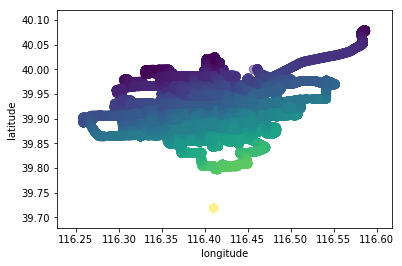

In [446]:
tongjitu(taxi_data_6275_without0_time0)

In [526]:
import math
from math import sin
from math import cos
from math import degrees
from math import atan2

In [527]:
def getAngle(aa,bb):
    radLatA = radians(aa[1]) 
    radLonA = radians(aa[0]) 
    radLatB = radians(bb[1]) 
    radLonB = radians(bb[0]) 
    dLon = radLonB - radLonA 
    y = sin(dLon) * cos(radLatB) 
    x = cos(radLatA) * sin(radLatB) - sin(radLatA) * cos(radLatB) * cos(dLon) 
    brng = degrees(atan2(y, x))
    brng = (brng + 360) % 360 
    return brng
def radians(d):
    return d * math.pi / 180.0

In [528]:
longitude_1 = taxi_data_6275_without0_time0.longitude.values
latitude_1 = taxi_data_6275_without0_time0.latitude.values

In [529]:
angles = []
for i in range(len(longitude_1)):
    if i==0:
        continue
    #print([longitude_1[i-1],latitude_1[i-1]],[longitude_1[i],latitude_1[i]])
    ga = getAngle([longitude_1[i-1],latitude_1[i-1]],[longitude_1[i],latitude_1[i]])
    print(ga)
    angles.append(ga)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
37.49220350704525
0.0
14.34338816171794
0.0
0.0
0.0
0.0
352.7141924789335
352.71419880929074
345.6566923592998
339.0155565780691
341.8012553908475
332.9146886270323
339.01560972104966
339.01562648641914
345.65676662549686
345.6567786511095
341.80134718224
345.6568047606023
346.71952638244085
349.9613673449489
351.27774826953953
358.9149380378991
354.160296137795
356.16549545096905
217.49044495092733
0.0
89.99999679277977
89.99999679277977
123.09781900265978
142.50954686516133
123.09781130849063
56.90217582851909
49.00551999838865
130.99445530164655
113.4877550323771
123.09779014049394
180.0
0.0
0.0
0.0
0.0
270.00000320721745
0.0
0.0
0.0
0.0
0.0
0.0
180.0
0.0
89.99999679278307
37.49046684

180.0
180.0
159.0140953698716
200.98591021885042
180.0
184.87214756915947
142.5058314570599
180.0
0.0
180.0
0.0
0.0
0.0
0.0
0.0
89.99999679321229
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
180.0
180.0
180.0
180.0
180.0
180.0
165.6555878640056
180.0
180.0
165.6555678619343
180.0
180.0
0.0
180.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
356.00750758569933
358.8112949062691
358.2410232266225
358.87224848676874
357.6861334303816
357.71024240576065
357.9644645281768
0.0
322.4864985100247
0.0
357.95501862165554
56.41286375284159
126.1564820836673
130.97094464480261
132.935879475432
120.06785922956237
123.07605972725855
125.89184217976583
125.89182234409509
125.89180252635094
125.89178270864653
128.40971991607063
129.44336815219322
128.00917543147114
125.39354298401372
132.358533175444
128.00909849750838
135.3730773487191
128.0090458494717
130.97029856372217
123.0754788433436
127.10111151749481
129.65538972598046
130.25331037979026
128.00882311401875
128.00879881061655
128.0087745258386
130.97002170843427
132.358121778473
125.393101604734
129.4428112190376
128.00862469099656
129.14873482502793
123.07509402615614
126.66072224996998
100.54089837006063
89.9999839778045
71.96285797712869
33.34697373329658
17.071225399044692
8.729313909295911
7.291613253784874
0.0
0.0
0.0
7.291580610266067
7.291574376574886
3.66060220294730

259.4580161476998
264.6840523542809
257.75043615992143
255.39701840028837
242.47723063990918
246.5282187648126
236.9221866429097
251.96112879721636
246.52829781978213
249.58505727480298
246.52830298474794
251.9611797333381
251.96121273609708
244.91362344888464
248.1580348711957
249.58516642456053
249.58517189261184
247.6393557146731
251.33878374356763
255.3971752452198
255.39717727486502
256.2743508763216
251.96135108989353
251.96133038276443
270.0000128189366
254.403371142427
246.5284902342281
259.4581603039756
251.96134510958694
255.3972118907217
270.0000192283853
257.75060405998227
257.7506058072552
255.39721800983392
270.000012818918
251.96135742662057
270.0000096141871
246.52851467136696
270.0000064094571
270.0000064094571
270.00001281891423
270.00000320472856
236.92254856896636
270.0000064094562
270.0000064094562
270.0000224297054
270.00000961418425
270.00000961418425
270.00000961418425
270.00000961418425
270.00001281891235
270.00001281891235
251.96136480609556
276.75376775487155

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
14.338435106551003
7.283234704378174
0.0
37.48218387795015
0.0
0.0
0.0
10.852397902219252
345.66159498694697
339.0223750727705
322.51785646062433
0.0
270.0000032081828
303.10570187495733
270.00002246407297
257.73780701946544
254.38740549571835
261.7554643893065
270.0000320936918
270.00003530295294
270.00003530295294
270.000035302953
270.00004172097675
270.00003851005374
270.00004492981054
267.2349215610871
270.000044929804
267.1287409554397
270.0001123236449
275.02450247812664
271.55638644679743
272.3337345838748
276.7610556010888
276.76098696498354
270.0000706038487
263.2390836409837
256.6613400331749
248.63359447646695
255.38217514359815
244.33839574115353
253.7490696325507
251.0591937635782
246.50610400437594
253.83892885297814
253.83893332390494
252.94210068646072
249.5652482529411
248.63375351634926
255.3822725360115
248.13702283306378
251.94333095384684
251.94333342577357
255.38228683468526
250.214456471034
246.5061907558271
242.45252436801

0.0
0.0
0.0
0.0
0.0
0.0
0.0
37.483198313288426
0.0
6.2519058795003275
0.0
10.85276779959355
0.0
10.852756938204038
10.85275075094438
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
352.7165737529812
0.0
342.94707709269886
345.661239529032
322.51714353424575
332.9223242650518
303.1050567619554
270.0000192565374
270.00002246350857
251.94361634213905
261.75566631877746
251.94362374141272
255.38253486609483
255.38253895240075
253.83923540064774
253.83923987074024
251.94364841095268
259.44734500349995
270.00001925649246
251.94364173078412
270.00000963220543
270.0000064161895
270.0000064161895
0.0
270.0000032080947
0.0
0.0
0.0
0.0
0.0
217.48290565999602
200.97815454764668
142.51708218898153
180.0
159.02183148167626
180.0
194.33880300153962
270.0000032080882
0.0
270.0000032080882
0.0
0.0
0.0
270.0000032080882
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

38.61925110675793
41.992201087586864
43.39964812731034
37.43476460237605
0.0
0.0
270.0000032136819
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
56.849388198122256
37.43475887834228
37.434749550974914
56.849372847552274
44.544857343570015
37.434714183370886
37.43470496152486
0.0
0.0
37.43470203938432
37.4346979737947
37.43469398736556
37.43468989538616
56.8493151179091
37.43468174660654
37.43467765462327
37.43467373855367
56.84929134700673
71.91415326369759
48.94828437694622
43.7381159642469
42.571136640595114
39.50212839381027
33.27103258342066
37.4344839761913
37.434450321911356
37.434417872409085
40.734954601398954
37.434347716738955
37.43430595935314
40.23401786977041
40.09918734587029
40.09914591328129
37.43410192307914
39.864887599309725
38.21566707068354
39.66839259713231
37.43377210905254
37.43371818762944
35.24523616602767
35.245184672143466
32.93190729910049
31.024904711976262
32.93180374924356
31.024804460865198
29.000005450699575
26.20135181982755
24.166920310353305
25.223151

0.0
270.0000032091605
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999679083948
53.29882390267079
62.44505826582213
62.445051403346724
60.79230435865264
56.886251299741275
62.958164156878354
66.49942720426384
66.49940882703584
62.44493227936812
68.62749536241432
64.62246841679541
66.4993790799146
64.62244248024643
68.13057220626195
66.49934232877956
63.35604257444891
66.49931475196883
66.49930250094053
66.49929024322603
73.24639051091674
66.49926880591642
65.95009921377294
65.01975563648415
68.86769721451282
65.01971394687939
65.01969791647548
66.49913511191124
66.49911980186596
67.82153121424363
62.44456236983308
69.00943031528124
69.85237846381312
67.82145800834837
69.00937708320714
67.82142873174291
70.20805784931133
66.49896860922809
66.49896751974472
69.00930704672481
37.472928954866916
0.0
270.0000032092511
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.0000032092511
270.0000032092511
270.0000032092511
180.0

270.00000320746466
0.0
0.0
37.488329921905915
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.0000032074651
270.0000128358002
270.0000128358002
284.6147458265373
270.00001604207966
270.00001283580207
270.00000641493114
270.00000320746557
0.0
0.0
270.00000320746557
0.0
0.0
0.0
0.0
217.48833228035568
230.8248419949492
198.82391085807174
178.06190673917138
177.68825535055066
180.0
177.688245922134
175.12874479569382
177.6882364761068
175.1287249787432
180.0
175.1287122390063
177.55994031516298
177.25536696654467
180.0
174.5232606586859
174.52325428614586
173.7466709489879
177.07267415979857
180.0
180.0
176.8639701461234
176.62326902738755
169.96201992526528
177.68817107178074
180.0
180.0
176.01111144754077
180.45782234724206
186.25389143910598
180.0
217.4920323279398
0.0
270.00000320703623
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
178.3100246758761
180.0
190.85624163201913
165.65659542829314
180.0
194.34341862462406
190.85626328765514
190.85626950386046
190.8562756905655
187.285

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.1385806469824615
0.0
357.90646405756206
356.7212403481633
0.0
357.0703508866012
358.21749690559955
357.80195532720853
0.0
355.12487136240134
0.0
0.0
355.6103921193995
355.1248982018069
355.6104042362453
0.0
355.61041634159693
0.0
355.610429073014
357.6864334433368
355.6104475508946
0.0
355.12496677735913
0.0
0.0
355.12498587833664
0.0
355.12499860426675
354.51913608247247
355.12501060954827
355.1250233712339
0.0
0.0
0.0
0.0
0.0
357.55812064687086
0.0
355.12509332734123
0.0
355.6105864515541
355.61059283458025
355.6105992063558
0.0
355.610611938405
0.0
355.61062405599137
356.96974948144566
0.0
355.125183118201
356.74577409286655
0.0
0.0
353.7422589170186
0.0
0.0
356.62092227638504
0.0
0.0
0.0
0.0
351.27237156235765
0.0
3.659905965500684
0.0
7.290173461985205
356.0084195726166
0.0
0.0
357.5582386452482
18.20897210183523
37.508609929443594
0.0
89.99999679488428
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

0.0
347.0361967657569
351.27497841733
355.6120574214108
349.14058196378915
351.2750022242554
0.0
353.74422544075225
354.5211092667065
354.521115620253
355.1267735895572
350.32306415630615
355.1267863095959
0.0
356.622014263118
357.41559786399034
351.27515774159417
354.1583968417205
357.4156155568884
358.309560319912
356.62207128468924
354.5212825142933
347.63455126750944
345.652997902553
342.93747798152043
0.0
322.50059762954396
270.0000032061819
0.0
0.0
0.0
339.0104341676736
0.0
0.0
0.0
0.0
352.71229294831306
0.0
345.653053921721
0.0
0.0
349.14104117160343
10.858952639829226
17.062433478838386
8.724614376720353
20.98944800514903
27.0914135437057
37.4992033573086
56.91046363459441
89.99999679379471
89.99999358758947
89.99999679379471
89.99999679379471
0.0
0.0
89.99999679379471
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999036620699
66.50305977811615
89.99999358275204
89.9999935827521
89.99998074033368
89.99997432209545
89.99996469001155
89.99998074033368
89.99994864270542
89.99993901237707
89.99994543242121
89.99995506058997
102.26382625965721
136.21661488946188
148.4757908044689
167.64367625576403
174.52542762422206
174.5254212778798
180.0
176.6246312618074
181.41684094317176
182.92619455471544
186.25096089005012
180.0
187.28240425721563
187.2824105896203
180.0
180.0
172.71757151252768
180.0
172.0636061811008
169.14874254386234
172.7175410012204
103.95093595035365
89.99991333738137
81.75454645594357
89.99997432292093
80.74075416258779
84.67778594629482
89.99997753355717
89.99995827276325
80.13520571153191
89.99997432290593
80.74074883276148
89.99997111272853
81.75453932907175
89.99997111272432
81.75453814307781
89.99997432289467
80.7407448527486
89.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
322.53592799081315
0.0
345.67058658090855
0.0
14.329399346898867
0.0
0.0
20.96506932528075
0.0
0.0
0.0
89.9999967897133
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
322.53600483204616
0.0
349.15456881112755
342.95806709501915
339.0349815070064
322.5360800955429
314.38310955057125
303.12299424300073
288.06799811346343
277.43470551535887
277.43470657513706
270.00003533492713
273.3945869816855
270.00004175952597
273.1122987846247
270.0000803060551
272.87332177923247
270.00004497140833
270.00004497140833
267.3317749928803
270.00004497140173
270.00004497140173
270.00004497140173
270.00009315615097
277.95923428935885
285.62255401132234
276.4739349088897
274.6626703372258
274.9719993146538
274.9720000361033
284.6271837948641
281.35176976810027
275.3251667658284
276.2062450342791
275.7321586422803
272.37240620291567
271.38448114619234
270.0000256973781
267.07067383841155
293.5079736132585
303.12312022265917
284.627174192322

180.0
172.71453220258877
180.0
180.0
180.0
180.0
188.72201634200403
180.0
190.85574970184345
190.85575592018284
180.0
180.0
176.74789706563274
178.20667106821782
181.12680758528202
180.0
184.38653853662532
180.0
184.87171522243642
185.47718673213845
194.34317396429302
217.49180469997137
251.94908400407883
288.05096732055944
306.6832348679937
348.4391093431072
0.0
0.0
0.0
356.0108949844852
0.0
0.0
355.61349019005667
0.0
0.0
7.285619189946374
20.983976422295825
37.49130865193143
54.08634732661477
71.9487362938657
89.9999839596369
86.07488891117839
89.9999839596345
89.99998075330359
89.99997433707819
89.99997433707819
81.75808850627055
89.99996792164
89.99997113061102
93.55217632029684
89.9999198067249
92.66558633224042
89.99990376811564
94.38505872163779
92.19566270411462
89.99989093690971
94.38505744090935
89.99994867715588
89.9999454691615
89.99994867715588
94.96699057962104
89.99994867716339
89.99995509182861
89.9999582982964
97.16150064491944
89.99996150668017
89.99989093776765
89.99

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
180.0
176.62164460288318
180.0
180.0
172.71128343279827
180.0
180.0
180.0
180.0
187.2887502109062
180.0
180.0
180.0
186.25645981961847
180.0
180.0
180.0
185.47952373877746
180.0
180.0
187.28883330621804
180.0
186.2565186311376
192.36730567640726
185.97426176560631
180.0
184.38848889195341
180.0
184.6185130904234
184.8738998136898
196.05535527841923
208.73042620229924
221.83975520455044
234.0991466015472
250.43633661086426
263.2444465291269
270.000035261783
270.0001186065321
261.0248247204152
264.2762579417161
270.0000128224572
270.0000096168429
270.00000961684293
270.0000096168429
270.0000160280715
270.0000192336858
270.0000192336858
279.25100320981403
271.9640291860386
272.8691341613294
270.00002564492564
270.00002564492564
270.000032056157
270.000032056157
270.0000352617727
270.0000352617727
270.0000352617727
270.00003846738844
270.000035

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.00000320739485
303.099262942711
279.2560541189015
270.0000224551647
270.000025665106
270.0000320810856
266.60861929865007
263.79942765180147
270.00004170527114
263.79942855785504
270.00004170526506
270.00004170526506
275.7269827661277
275.3203563039963
275.32035707149987
270.00004491372346
275.32035784549333
288.05273594187383
276.20065471988437
270.000032081109
276.7593436820265
277.42806154634366
270.0000384967085
271.9147781748708
275.7269919006863
275.32050069378226
275.9544986173877
273.39152976686387
265.61455867015474
254.39101634384548
236.90075847366174
194.34177485063833
180.0
184.38612651340364
175.12874834738795
190.70148013205366
264.2732233258838
270.0000449130612
274.6583910581853
270.0000481197379
274.6583917397151
270.0000513294702
270.000048119745
274.96743962527887
275.32028215916444
275.32028293215916
281.34157506089855
275.7269071907939
275.726908016601
276.7592488380819

270.00002248332254
270.00002248332254
270.00002248332254
270.0000192716619
282.2688265624791
297.5608012002152
322.5332321182642
322.53324310269613
354.52773677407623
0.0
354.804474214795
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.0000032100054
270.0000032100054
270.0000064318997
270.0000032100054
246.4940600586669
236.87942900928584
194.33060179223716
189.32633531544107
188.71446219625136
180.0
187.27916712854235
180.0
180.0
187.93285483229403
197.04351714460958
194.330728624348
197.0435429823963
188.71452999998664
180.0
190.84650651872224
200.9670003339309
204.69507082373624
207.06423457262233
217.4668449363143
228.9813502158477
228.9813584878157
270.00001284576683
251.93385077978292
270.00001605928674
270.00005138900434
270.00001605928674
270.0000192716197
270.00001927161964
270.00001605928674
284.62560535748315
270.0000160592891
270.0000160592891
270.00006423477873
259.44136443962475
270.00002248327326
257.731

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
217.48804136570362
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999679250118
123.10009588185704
142.5119503784632
0.0
89.99999679250209
0.0
89.99999679250209
0.0
0.0
89.99999679250209
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
180.0
165.65865897687343
159.0182732420493
180.0
165.65864091275512
165.18539736446485
180.0
180.0
180.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
356.8644577522491
353.7476040812827
353.0955691974317
356.01182666034515
0.0
0.0
356.343249977884
0.0
356.62387357657866
0.0
353.90488038670287
353.608537470251
353.5966832450285
352.71632330485625
349.1469616016989
352.0622922243422
351.28019188409496
354.5243877725927
353.7479754505938
349.9642274218597
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
37.48363892047428
20.978651763995856
37.48362148365317
0.0
10.852942657095412
349.14706353337147
0.0
0.0
10.852917896880342
14.339079771387958
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
322.51650658511295
0.0
345.6609403434003
0.0
0.0
352.71644745374306
339.02151093908213
351.28030969635654
345.66099456741614
345.66100055248853
0.0
349.1471610330972
0.0
352.71648321882793
0.0
6.251918564379366
8.719636354135503
0.0
7.283485204813189
7.2834788718712

180.0
180.0
175.1303702380368
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
181.3310872768749
179.7321001853196
176.3436409437884
0.0
180.0
184.87010344275922
182.92657826815147
188.71944210846019
212.58012339734032
278.2444555885052
0.0
270.00000320812705
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
194.33864238592923
194.33864840185262
191.4091804220902
187.93741613880843
200.97806542151855
188.7195123637605
219.71832408582387
167.17456841408193
171.28038604975882
165.66109839889123
162.94690704180675
171.28036598590325
172.71649786931368
167.04403146787536
171.28033964987674
171.81767970211718
168.1871250461969
180.0
171.2802932465412
180.0
180.0
169.14709889951143
180.0
180.0
175.61473471887814
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
0.0
0.0
180.0
0.0
180.0
180.0
180.0
180.0
180.0
180.0
188.7198522272741
180.0
187.2836915748527
180.0
180.0
186.25210529473685
180.0
188.71993521322935
190.85317514995384
185.47571165284512
192.35885764593246
18

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
217.48369090522306
246.50713120550256
217.4837030599008
267.01441467026586
277.7711123166247
270.0000192559496
275.7280653664412
270.00002246282605
270.00002246282605
270.00002246282605
270.00010910572564
270.0000320895575
270.00002887996806
270.0000288799681
278.2441479585455
274.38637151665694
274.65934204712715
266.60797494176404
236.89577503106148
268.74489601730966
349.70574700133693
0.0
0.0
339.02143496409155
357.9413124651468
316.9902364005169
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.869888899572345
10.852048050636313
349.14795814061375
339.02301618351567
0.0
0.0
37.48120574074329
332.9237118194026
318.1840097278773
318.7703826630008
316.2137654556452
288.30934518605284
270.0000288853384
270.0000513507592
270.00005776935654
270.0000288853384
270.0000288853384
270.00005776935654
270.00003209496714
270.0004204340829
270.0000288853384
278.2449754558212
296.8922413996944
280.55342392552024
267.0139638131835
279.2586582

104.62790758727289
102.2707569260773
100.56036475204951
89.99994538664703
89.99996787366717
89.99996466079602
89.99996787366717
89.99996466079608
97.43508233536863
89.99996787367184
96.76573270052279
89.99996787367655
89.99996466080637
92.19796764610959
89.99996466081154
89.99996145032003
89.99995823616979
89.99995823616979
84.67453649233477
87.23275894544975
89.99995181248954
87.58934559209479
85.33706202225142
89.99994859940568
85.3370613332815
87.6645864496129
89.99989719878135
87.46683917771207
87.4233214268894
89.9999518124402
87.33143406661316
89.99995502417511
84.67452874809669
85.02771038928535
85.1560356351319
85.33705250140696
89.99994859930041
89.99994859930041
89.99995181237671
88.40937475764906
89.99995181236966
89.99995181236966
89.99994859929285
89.99995181236966
89.99995502411582
88.27114725447382
89.9999421739642
86.44395526921778
89.99942174140693
89.99990683555433
92.76707647029963
95.7324109160686
89.99996145019588
96.7657523122096
83.23417701232813
87.3314289931427

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
51.94236430017793
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

89.99997112779977
89.99997433457543
89.99997112779977
80.74383166018663
89.99997112779556
80.74383034371459
79.44941801291208
79.4494165169142
69.56938829071709
56.900373500449575
56.90036970680637
0.0
0.0
322.5114681060945
270.0000032074417
322.51147203145257
0.0
322.5114762032175
0.0
0.0
0.0
270.0000032074426
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
142.51147363355858
56.90034671148584
89.99999036975112
71.94704570367855
80.74380908913446
89.99999679255598
0.0
89.99999358511195
66.51076114179767
89.99998717022197
71.94703832003222
71.94703586597353
89.99999036974407
89.99999036974407
66.51075196341105
89.99999036974265
66.51074886989852
89.99998717021447
89.99999036974123
89.99998717021447
89.99999036974123
89.99999036974123
89.99998717021447
89.99998717021447
75.38533589025519
89.99998717021259
89.99998717021265
89.99998717021259
89.99998395801401
89.99998395801401
75.38533386381687
80.74379846178152
89.9999839580093
89.99998075135352
77.740493062528
89.99998395800696
83.

303.1031671334672
270.0000032078731
270.0000032078731
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
322.5151973145422
270.00000963154275
270.0000096315428
257.7389533538451
270.00000320787353
0.0
0.0
0.0
180.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.00000641574616
293.4920405949608
270.00001604412023
257.73895508286057
255.38350894808858
270.00001604411557
251.9448131387627
261.7562482486124
270.00000641574337
270.0000032078717
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.00000320787217
270.00000320787217
270.00000320787217
270.00000320787217
270.00000320787217
270.00000641574434
270.0000096315372
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
236.89684952757796
270.00004492378855
255.38351303

0.0
0.0
0.0
0.0
0.0
0.0
270.0000288548036
270.00004809292255
264.68188750235623
270.0000288547994
262.57500317710685
270.0000288547952
261.76076940840585
270.0000320632537
263.24346357779723
270.0000673312284
268.2641874462885
262.5750074536422
270.0000609193929
261.76077415420775
270.0000256486881
270.0000256486881
259.4538071778879
270.00002244259883
270.00001923651325
270.0000320632303
270.00001603042773
270.0000128243422
270.00001282434215
270.00001603042773
270.00001603042773
255.39130531004588
270.00002244259554
270.00002244259554
270.0000256486806
265.3435391754283
270.00002885476147
260.7477156329268
270.00002885475726
266.07627802276744
270.0000320632116
270.0000320632116
270.0000320632116
268.7763058531589
270.00002885474885
278.2392764511685
270.00002885475305
270.00002885475305
270.00002885475305
270.0000256486694
270.0000256486694
260.74771827943476
270.00006733114003
236.91150744407707
194.34741598289605
180.0
180.0
171.2750434030047
180.0
171.27502964101973
187.287980563

89.99998076399737
108.04533276268978
71.95464159995208
113.47978934554015
89.99999358800005
89.99999679400003
89.99999679400003
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999038200008
89.9999871760001
89.99997114600023
89.99998397000013
89.99998397000013
89.99996473184137
89.99996152602131
89.71308630033451
89.99993267059813
86.27187084720174
81.76093215094858
81.7609309554797
89.99997435198526
89.99997435198526
81.76092978843963
89.9999711459792
81.7609285826316
89.999971145975
82.57513500910329
89.99996793759271
80.74789375326776
89.99997435197031
92.86931414645346
73.26213350500348
89.99999679399536
89.99999679399536
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999679399491
89.99999038198462
89.99999038198467
89.99998396997444
89.99998396997444
89.99998076396929
89.99998076396929
89.99997755796414
89.99997435195905
81.7609214847493
89.99997114594976
89.999967

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
180.0
165.6522610162001
152.90712680526917
152.90711664330456
128.02211626038525
102.25410017870445
102.25409842787292
100.54591314348261
100.5459116394523
99.25203904984073
80.74790965414468
89.99997435201516
89.99997755801326
89.99997435201516
84.2754938433655
79.45404197997345
89.99997755800672
94.96526170266935
89.99997755801002
95.31796288398493
89.99998076401135
89.99997755801326
89.99997755801326
89.99997114601706
91.14835523001784
86.07626114844402
89.99997114601706
81.76090981140584
89.99997114600865
81.76093688888182
89.99996793763012
81.76093569858426
82.57514143341825
89.9999679376208
89.99997114599603
89.99996473183626
97.42479444560388
89.99996473184137
89.99996793762546
89.99996793762546
89.99997114600023
89.99998076400016
108.04533029075606
89.99999038200144
56.91214170686459
89.99999679400003
0.0
0.0
322.4990489712733
270.0000032060023
0.0
0.0
0.0
270.0000032060028
0.0
0.0
0

99.86032200333727
94.6578849110366
94.6578842466858
89.99994547004508
94.38498603751225
89.99994547005304
89.99994226220815
89.99994226220815
89.9999422622081
94.38498540347666
89.99994547006094
94.38498476175965
89.9999486780099
91.3575974621931
96.75858100435346
89.99996471578777
89.9999743375277
89.99997433752765
89.99998075364067
89.99997754713962
89.99999358586666
89.99998075364067
89.99999037088133
89.99998717173332
89.99998717173332
89.99998395991548
89.99998395991548
89.99998395991548
89.99998075364067
89.99997754713962
80.74487795826371
89.99997433752395
81.75822970289761
89.9999743375202
93.55211477611363
0.0
89.99994547007685
42.115956895179465
10.231309869698123
10.855990690344527
5.477145381611081
5.477138997192753
5.477132640250375
5.477126296499421
8.18465739631074
5.839796202315881
5.47709529299658
6.25371478566268
6.253708431940481
0.0
349.1441561617491
0.0
0.0
353.7463160049686
0.0
3.6575509572721217
0.0
4.386430723328488
0.0
0.0
355.12843557379
357.41646237563856
350

89.99999035959223
89.99999035959229
89.99999356645486
89.99999356645486
66.4886769509124
89.99999035959087
89.99999035959081
113.51130376871095
89.99998715074764
89.99998715074764
75.3705944246314
89.99998071918168
89.99998071918168
79.4385159803897
89.99997751061647
73.82614401653274
80.7342100977416
81.7486953187676
81.74869414340014
89.99996787029562
89.99996787029562
81.74869293956158
89.99994537950857
89.99997429551922
89.99997429551922
89.99997751059675
89.9999775105967
86.6930361197837
88.23182059274654
85.02716003294148
89.99994859065464
85.33653947355054
89.99994859064714
85.60974806948263
89.9999453790848
89.99994859063963
85.60974742860702
89.99994859063207
85.33653743538798
89.99994859062457
85.33653675353867
89.99994859061701
85.33653607611905
89.9999485906095
85.02715496611256
85.33653471537201
89.99995501740722
84.67393198970825
89.99996144393117
84.26687295529229
89.99996465676662
89.99996144392554
83.79270586657543
89.99995822955378
84.26687127715275
89.9999582295477
8

175.61391368391662
180.0
180.0
185.4766248893401
180.0
187.2849880462677
180.0
177.07273986083408
174.52333453712185
175.1287370224111
175.12873064120663
180.0
180.0
175.61383265194934
180.0
175.61381991716837
180.0
174.52326620645226
180.0
174.52325271211112
177.25535056278807
180.0
176.62328918376056
180.0
180.0
180.0
217.4897179615382
180.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
180.0
180.0
173.74659849372665
173.74659216801933
174.52317324209196
174.52316687078144
180.0
174.52315416996146
180.0
175.1285706894546
180.0
180.0
174.52311999848223
178.31013832403573
177.41649550568889
177.90809664665994
180.0
180.0
194.3425876946849
217.49058873479532
229.00569795337753
255.38643195979523
257.7414427347214
259.4502187550915
270.0000288700927
274.1425288635111
263.2411374954187
270.0000352878553
270.000032079142
261.757948094641
270.0000320791373
266.07491542613616
261.75795046473297
260.74455224388566
249.57085381183435
240.80730966290622
240.80732034425316
249.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
322.5107611500896
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
349.1472770833668
0.0
0.0
0.0
0.0
0.0
0.0
0.0
339.02187187217004
316.2119716567354
258.5042711551308
253.49181290481198
257.48569860737047
270.00003529969933
262.57043961035686
262.57047330431544
262.570442820454
270.0000288806388
261.75572213228133
270.0000256735455
270.0001508272528
284.61742437167396
270.00001283825986
246.50663243775273
270.00000320807925
270.00000320807925
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
180.0
159.0217502851757
123.10482362282607
108.05626206936466
89.99998716175327
89.99998716175332
89.99998716175332
89.99998716175332
108.05625961374085
89.99998716175514
104.61737592488714
89.99998074362571
89.99997753668174
89.9999775366818
81.75567387828869
80.74201561528776
89.999974326477
81.75567150512336
81.75567032227531
89.9999743264695
81.75566912477206
81.7556679445089
73.83926937024165
81.75566437325745
81.75566318580832
75.38255447901679
73.83925595094718
75.38254629583611
75.3825422184799
68.63412948285679
75.38253199369956
72.

352.7158717617278
342.94549801546384
339.0199947029728
330.0926948292998
322.51444923938203
297.5448688993454
276.46882505497786
270.0000288780194
270.00003208739224
277.42895502835853
270.00003208739696
270.00003208739696
270.00003208739696
277.4289561035214
262.5711080693875
270.0000352964823
270.0000352964823
267.59157230933283
270.0000288780194
265.614033677552
270.0000224613071
259.4483333426411
270.00001925464744
270.00002246130384
270.000025668243
285.3500299506566
291.3640874765697
356.01176977288407
37.485469405751985
89.99999679220326
0.0
37.4854653826211
0.0
0.0
0.0
0.0
89.99999679220281
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.252414101310251
7.284072446419998
357.90848724986705
0.0
0.0
0.0
0.0
351.27975291856245
0.0
0.0
0.0
345.6601370961954
353.74766924165135
0.0
0.0
11.813533187289863
6.252305393536517
0.0
14.339782587022626
0.0
0.0
0.0
0.0
0.0
0.0
345.66025556876883
0.0
345.6602656377948
339.0205230112999
339.02052854836023
322.5151944263882
0.0

282.2583163858291
255.38676272028772
270.0000320783928
270.0000160403842
270.00000641425316
246.5128564154685
270.00000962929715
270.0000224532766
270.00001282850445
266.4478205799975
270.0000128285026
270.00000962929573
270.0000064142513
270.00000962929573
266.27069492226497
255.3867709007386
270.00014113994337
270.00000962929295
270.00001924670767
270.0000064142494
270.00000962929295
270.0000032071247
270.0000032071247
261.758142693218
270.0000481163662
270.0000096292915
284.6132591335654
279.2552866515416
270.00000962929437
270.0000032071252
217.49126892067568
0.0
270.00007698584085
270.00002245326675
259.4504671526248
270.0000096292915
270.0000096292915
270.0000192467049
236.9029654026587
270.00000641424754
236.9029692285785
270.0000032071233
270.0000032071233
180.0
0.0
0.0
270.0000096292873
0.0
0.0
180.0
0.0
270.00000320712235
270.00000641424475
270.00000962928596
270.0000160403631
270.0000160403631
270.0000192466936
270.0000192466936
270.0001122703244
271.33373934890307
268.22230

0.0
0.0
0.0
0.0
0.0
0.0
89.99999679307285
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
349.14347715411895
0.0
349.14348789515
0.0
0.0
270.0000032069356
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.722589068245895
351.2774171986559
0.0
355.1281192328989
0.0
0.0
351.27746608498285
0.0
0.0
0.0
0.0
351.277497400189
0.0
0.0
349.1436951706281
355.6133498805895
345.65654560555396
353.7460488689714
0.0
0.0
339.0153795792493
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
355.61338368164434
358.7679080881327
354.84323085290583
0.0
303.09673375623544
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0

0.0
0.0
0.0
20.979468605435386
0.0
37.48480275585689
0.0
0.0
0.0
0.0
89.99999679212505
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
284.61656954107355
282.261097332554
282.2610990464551
270.00002246193367
279.2574222875699
280.5520023350368
288.0552611065335
294.97117230396725
289.576505875694
282.26114174942967
267.7373264454145
249.06888770324605
228.99977453341046
236.8968494942293
200.97948662538988
207.07935741848402
233.7412963344144
251.94496761101126
270.00003850620635
270.0001090987049
275.72785152608685
275.7278110655808
275.3211264846094
272.6663801367985
275.32112803336366
275.72781438411084
273.7302897949968
279.257383768219
274.96823359678814
270.00002566886155
275.32117720389294
282.2610573747959
286.74704984681495
0.0
288.0552209276058
280.55197521048484
303.1031479662079
284.6165149783002
303.10315568146245
270.00000963153576
270.00000963153576
270.00000963153576
288.05521005369707
270.00001925515363
270.00000641574434
293.4920344653551
270.00000641574525
276.7603343698

89.9999647319134
84.27550213316806
84.68195428488076
85.03464859600035
85.03464787702359
85.61636665065345
88.5068458190351
87.86754124270442
86.07626229540512
89.99993908355395
86.27187464374617
86.27187409493104
89.99993587766312
86.36248716410591
86.27187247260474
89.9999326706178
86.44893001711341
86.60995017479672
87.66774881618443
88.22265636707743
86.44892744096865
89.99993267055885
86.44892691580407
89.99993267054901
86.27186813338295
89.99986534277468
89.99993267053924
89.99993587756023
89.99993587756023
89.99993267053924
89.99993587756023
93.92362329041089
89.99994549655582
91.5880965631892
89.99995511427136
92.76320362585773
89.9999551142779
85.03463707420639
89.99995511427136
85.3435555787903
85.0346356252416
85.34355423315753
89.99995190836108
85.03463418339885
89.99990061003996
95.31797214117404
95.3179713685783
95.31797059718417
101.33684501053028
89.9999551142779
95.72442860778881
89.99987175519527
87.33516447571282
92.8693124780824
89.99995832015532
92.98388763029538
8

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.0000128216216
229.02160917505262
217.5061298204144
207.09722962017588
217.5061540137637
245.4857843323443
253.85213457409776
265.61729243115036
261.76252528746863
270.00002884591794
270.00003205395126
270.0000288459179
278.2375324067238
270.00002884592215
270.00002884592215
270.00002884592215
270.0000320539559
270.0000320539559
270.0000320539559
270.00003525935153
270.00007372100157
270.0000352593515
270.0002243678547
270.0000769265262
270.00003846276843
270.00003846276843
270.0001089785617
270.0001826992176
270.0000352593515
270.00003525935153
270.8784697405842
280.5440205

273.92511108777364
261.8697394918121
266.4711361748934
268.2223107052163
266.27071120651095
267.9262283362806
265.6149572192202
270.0000513226718
265.03302601800914
270.00004170156353
263.7999754928797
270.00003528468085
261.7581818461008
270.00002566280943
270.00002245315534
276.2001005936462
297.5399059092487
288.05120210664205
310.9935055318531
303.09694798644756
322.5086284358373
0.0
322.5086363639532
0.0
322.50864061402723
0.0
110.42864556512473
0.0
0.0
0.0
0.0
0.0
266.8249966741727
263.8846900734097
262.80978467372813
268.4606321267837
265.34211733181417
264.45548091977497
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
236.90316436506117
270.00000962921706
270.00001282839776
270.0000160402484
270.00001924655595
259.45054844312693
270.0000224530865
270.00002886916985
270.0000288691698
270.00002886916985
261.7582079514977
270.0000320781118
270.0000320781118
270.0000352845624

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
66.51119532983796
89.999993585244
89.99999679262203
89.99999679262203
89.99999679262203
56.90087485581131
89.99999358524303
89.99999679262152
89.99999679262152
80.74399369111433
85.03251490993665
89.99998075176381
89.99997754495007
89.99997433502512
89.99997754495007
89.99997754495007
89.99997754495007
89.9999582949298
102.25921329653971
89.9999839583536
89.99998717048425
89.99998717048425
89.99999358524212
89.99999679262106
0.0
0.0
0.0
89.99999679262106
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
82.57198348860919
89.99997112830562
75.38562794238294
89.9999871704805
89.99998075176097
89.99996471018187
99.25595764355222
130.9958551079161
159.0175652063349
142.51088966814098
159.01755165522968
180.0
0.0
0.0
123.09907406278006
89.99999358525338
142.5108718199309
159.01753761063242
0.0
0.0
0.0
142.51085453082112
0.0
0.0
0.0
0.0
180.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
80.13

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
37.4826891684919
12.358165914762196
10.852580508194364
9.910808181240725
4.870067312063497
0.0
0.0
345.6615447801627
0.0
0.0
0.0
0.0
37.48220417478473
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
20.977650148096075
0.0
0.0
37.48216771085686
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
37.48214756355924
0.0
0.0
0.0
89.99999679181576
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
14.3383829278078
0.0
14.33837284995542
0.0
0.0
0.0
14.338348751968226
0.0
14.33833874112014
0.0
0.0
20.977521348815458
0.0
0.0
0.0
0.0
37.481981928606785
0.0
0.0
0.0
37.48196160502141
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


217.48811027289892
217.48811406638805
236.8999730572657
200.98177514411822
177.68831402676892
230.82479910015914
225.08597167925322
184.87113205029792
187.28484913896213
188.72125284418516
172.71513928792206
173.74690645377905
172.7151255898009
165.6584359532295
172.71511298364635
180.0
183.37658686448316
183.1359083201246
180.0
176.23852817010982
150.08966460678016
159.01765470081943
142.51101890597278
152.91716651565662
81.75741446888168
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
112.20135586522247
89.99999036996337
89.99998075180594
89.99998717051045
89.99998717051045
108.05255396410337
104.61430525089838
104.6143032059365
102.25918204551192
86.27021769218277
79.01125675096591
81.75745007214584
99.25594436111618
89.99995508657162
102.25919592334014
89.99998075179468
89.99998395837702
89.99998075179474
89.99998717050295
89.99997433506633
0.0
89.99999679262578
0.0
180.0
0.0
0.0
0.0
89.99999679262623
0.0
0.0
0.0
0.0
0.0
0.0
0

274.654659528039
274.65460927032836
270.0000224297446
272.663783324906
270.000019228405
257.750591952474
264.6841232044289
270.00002242974136
260.75154811289826
270.00002242973807
270.00002242973807
270.0000192283966
270.0000192283966
270.0000160236638
270.00001281893105
270.00002563489477
270.0000096141983
270.00001281893105
270.0000160236638
246.5284902342281
267.8059716359628
270.00001602365916
284.60282421380464
270.0000320425752
284.6028262549994
270.00002242973807
322.4880911887506
270.0000032047332
0.0
322.48809520349755
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.0000128189348
253.85533303860103
229.02757045110957
217.51194058492985
180.0
208.80270579644971
140.79756693677302
173.57061445220108
177.0702191855985
173.74141927027665
173.7414129682179
176.62044226612227
173.74139487739205
180.0
180.0
175.61006527200698
169.13573761592102
180.0
180.0
0.0
0.0
0.0
1

89.99997436098056
89.99997756665294
77.74864551461394
89.9999839737556
75.3949204882058
89.99999038425199
89.99999038425199
123.08170920770749
89.99999358950225
89.9999871790045
89.99999038425335
89.99999038425335
56.91827797154207
89.99997756664641
89.99990705349995
89.9999358985745
89.99992628442646
89.99991987446458
88.69041005452715
85.03579597647553
87.13119194880647
83.80346351111933
89.99996794986214
89.99996794986214
94.13990258150204
142.49255346953254
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99997115538554
96.19645777772178
89.99994871897081
89.9999743609693
89.99997115538974
89.9999743609693
89.99994871897081
89.99995512819851
89.99997756664311
89.99997756664311
80.75003047918591
77.74863858597939
77.74863687176844
71.9585689053257
49.02293790099702
37.507416005614914
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999679474598
89.99999038423795
75.39489807640473
89.9999807

270.00004490077293
270.0000224503865
270.0000416927545
270.00001924423873
270.0000320718837
270.0000128268532
270.0000096201399
303.09369270914357
270.0000128268551
293.48447013065663
284.61147090656146
290.4264133291524
0.0
0.0
270.00000320671757
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.0000128268719
0.0
270.000003206718
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.000003206718
236.90628570569316
251.95089286200664
257.74324183925
270.0000224504094
260.74592341802185
260.7459247421592
262.57360031601235
258.93712991603155
262.5735730642109
261.7591866049334
260.7459353699433
260.7459366853976
261.75919016785554
251.95094139409062
261.7591937284746
262.5735816462983
277.4264824973728
270.0000320718463
270.0000320718463
270.0000288630253
262.5735816462983
270.0000288630211
262.5735827127505
270.0000320718369
262.5735837843407
266.44828231546836
266.6093451777417
270.0000320718229
270.0000320718229
278.2408580752966
270.0000288630084
278.2408592558556
278.24086044445755
270

180.0
180.0
180.0
177.41573863260066
195.78481186723496
254.65700084392068
264.27509114614867
251.95325115890134
217.49863777969253
200.98904677625094
200.98905230552967
180.0
159.0109364988
165.653382537702
180.0
190.85873326584849
190.85873942173552
190.85875192230145
200.98913659426296
180.0
194.3466776181285
200.98916737067668
180.0
180.0
200.98919206626573
180.0
200.98920603554095
217.49888523073716
229.01420471537074
270.0000128249651
270.0000160359564
270.0000160359564
257.7450053911546
270.00001603595405
270.0000224436857
270.0000384768689
270.00001924140315
284.6094060237632
270.0000160359564
270.000019241406
257.7450053911546
270.00001924140315
257.74500712226353
270.0000224436824
270.00001924140037
270.0000224436824
270.0000224436824
280.54673547034906
270.000016035954
282.2550331014982
280.5467384688825
270.0000192414088
280.5467399859515
279.85792323244004
275.72494079792955
268.3035381467624
278.2397407336239
270.00001282497817
270.00001282497817
257.74499326202897
270.00

85.03346785421843
89.9999550985587
86.89112669733186
89.9999679276342
84.27413979796637
89.99998717295216
89.99999037971406
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999358647608
104.61164498330504
89.99998075547205
100.5483649273109
99.25420264989685
99.25420133437467
108.0493172048063
99.2541973444255
100.54835589498225
99.25419469024757
99.25419336894441
106.15436084440745
113.48470360463432
113.4846944442478
108.04928272707508
108.04927778751573
106.15433402898555
89.99997113660402
89.99996792774186
89.99997113660402
89.99997113660402
89.99997113660402
82.1872305305651
81.75902925369354
89.99996792772782
98.24091301714026
98.2409

89.99998396032754
89.9999871720629
89.9999871720629
113.48621431709842
0.0
0.0
89.99999037113008
89.99998717206472
89.99998717206478
113.48621124716584
123.09588305859381
89.9999935860343
0.0
0.0
180.0
89.9999967930176
344.41345639336095
161.55487904536312
159.0151719310752
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999679302414
89.99999679302414
56.904161461000115
71.94950253976435
75.38738397142623
77.74223712509547
89.99997754776228
89.99997754776228
89.99997754776228
89.99998075417443
89.99997754776228
89.99997754776228
89.99997754776228
89.99997754776228
89.9

200.98518601619108
217.49307947513532
180.0
142.50691363630392
123.0953169268355
89.99999037134091
71.94983265064752
29.914015627632182
14.343815455278616
0.0
6.254107808673098
5.4774282262692395
14.343759258392367
10.856501067723173
15.586751380036674
20.984996230199783
8.722607893495251
14.343670945675683
10.856445594029367
8.722589090098722
0.0
10.856423964235262
0.0
0.0
0.0
0.0
0.0
351.2774560340395
351.2774623015363
350.8260227793875
353.74601355217055
353.7460198753258
7.285891680536224
353.7460316473898
6.253962013641171
0.0
7.285863259300697
10.856259879545462
14.34341000267898
20.98458602948773
24.715014509077093
29.913209545362065
20.984550081371935
49.0072770777594
37.49213371985081
37.49213092650268
66.5135004586864
89.99999679297503
89.99999679297503
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.000003207025
270.000003207025
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.000003207025
270.000003207025
270.00000320702503
0.0
270.000003207025
270.000003207025
270.000003207025
270.000003207025
0.0

7.282620968198728
3.656070840010443
6.7277407169833054
3.6560575211889272
3.3754932004645184
6.727703695329694
3.6560372760058044
5.474768648303439
3.987349923564068
4.384593941562969
0.0
0.0
0.0
355.1304814470555
0.0
355.1304941935008
0.0
0.0
355.61545967755325
354.52532988060557
0.0
2.743587309930888
0.0
6.2509209244638555
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.2508176310503245
0.0
0.0
6.727372519689766
27.073736107140576
54.07340637940132
62.44883280678664
84.54844840338274
89.99991975239442
94.21053968031833
113.97593849160228
108.68214088468159
111.86572292951496
111.86571135526816
113.49671298425778
113.49670073038271
108.05895257746221
113.49667930128572
108.05893530039833
115.37335900610606
108.05891802339164
113.49663645162502
108.0589007482323
107.40671169895109
103.41837398281297
101.78673953296862
120.66054488808322
150.09860798217858
171.2816741854664
180.0
180.0
180.0
190.85124497200866
180.0
180.0
182.16844873425399
179.59695376909815
177.07368976359248
180.0
173.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999678973069
123.12273068146351
159.03482056524092
152.9379899148447
180.0
180.0
184.86691376788895
190.84555692863162
200.96528345876112
209.88830211143542
246.49248305135853
259.44042518610684
260.73591098910134
278.24982924320636
270.00003212149636
270.00003212149636
270.00003212149636
278.24983044889984
270.0000321215011
270.0000321215011
276.76529334750404
270.0000321215058
270.0000321215058
270.0000321215058
270.00002890808696
270.0000256968479
270.00002569684796
259.44042370585385
270.0000224853225
270.0000160607505
270.00001606075057
239.88809115926213
200.96532267512555
180.0
180.0
180.0
182.92469233598368
180.0
181.75581544563133
176.53769078694313
185.83434685981416
179.2494408120766
179.5934178276957
89.99999679001854
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

180.0
174.5275942617559
174.52758791002043
180.0
180.0
180.0
184.86749342095186
180.0
194.33120922794092
182.58139110936875
180.0
169.15310146399622
175.1324633571204
180.0
180.0
185.4725091529134
180.0
180.0
180.0
180.0
180.0
174.52744629318317
174.5274399148825
172.72040100806908
180.0
180.0
180.0
177.4185515700649
171.28496418770328
169.15287699737587
165.6684273735857
180.0
180.0
180.0
217.4684328397116
0.0
159.03186310311833
142.53155506591077
89.99999679022841
89.99999356856881
56.88131849040917
0.0
0.0
89.99999679022795
0.0
0.0
322.53156546337476
0.0
0.0
0.0
0.0
89.99999679022704
0.0
0.0
0.0
0.0
0.0
0.0
322.531573582021
349.1528757773017
14.331562188319594
10.847113481091185
351.2849731214397
353.75142226096125
353.75142860680137
0.0
5.472564004214689
10.847046779094399
4.867591875216249
0.0
4.382821799245846
0.0
0.0
4.867557864781418
0.0
0.0
355.1324633911872
4.867530232013223
355.13247614531207
0.0
0.0
0.0
0.0
0.0
0.0
4.3827311330422845
2.924976354440844
354.52760785927
0.0
35

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
332.9224036444652
322.5172554986443
270.0000032081125
0.0
270.000003208113
0.0
0.0
270.000003208113
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.000003208113
270.00000641622603
246.50641520854646
270.00000641622506
217.482752106837
236.8948930163491
217.48276015481886
217.4827642404059
180.0
169.14736509606018
180.0
180.0
169.14734807661694
180.0
159.02188458191495
142.51710737595488
217.48288956421166
0.0
0.0
0.0
89.99999679190387
169.14731389674398
182.09133757227158
180.0
184.38518743762228
185.4754954645495
180.0
180.0
180.0
180.0
180.0
180.0
165.6610644576475
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
142.51666990584727
159.02155163923635
180.0
190.85285314669036
188.71969045110237
188.7196966998192
197.05323374648307
188.71970926222383
188.7197155114665
186.25197751378772

180.0
159.01882145027662
180.0
180.0
180.0
180.0
169.14561794951214
169.1456117653663
169.14559299473535
176.86422785902494
180.0
180.0
172.71536970658497
182.13229099465715
180.0
180.0
180.0
180.0
180.0
180.0
180.0
200.98171003129133
180.0
142.51193830272877
159.0182760328704
180.0
142.51191817359694
142.51191412489396
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
201.9578068802458
245.16302592282997
175.38390761635355
175.12865350693914
173.7466474005197
173.74663469865334
180.0
180.0
173.74660933167763
172.40163802542975
176.2649739820613
180.0
177.2552781455164
177.83957046245246
175.1284815160659
180.0
180.0
184.38639760572048
180.0
183.9889976620759
184.38641738945742
184.38642374514112
180.70884340356935
270.0000032071388
180.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
180.0
165.65711726191057
165.65711127948657
171.27788211190955
171.2778758035348
180.0
180.0
180.0
172.71438808801236

89.99999679291648
0.0
0.0
0.0
0.0
270.00000641416705
270.00001282833404
270.0000160401688
270.00001924646045
270.0000224529783
270.00002886903076
270.00002886903076
270.00003207796203
270.0000352843976
270.0000352843976
276.7586867520421
270.00011547613997
264.2736520491672
270.0000384929209
276.2000521022219
270.00003528440277
262.57272420351353
278.24181181864384
270.00002886903496
270.0000224529816
270.0000224529816
270.00001924646324
270.00001604017115
270.0000096291707
270.0000096291707
270.000003207084
270.000003207084
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.0000128283359
270.00001604017115
270.00001924646324
270.0000224529816
270.00002566261094
270.00005773807
270.00002886903496
270.000028869035
270.0000320779667
270.0000320779667
262.57272420351353
263.8000257717514
270.0000384929153
2

0.0
0.0
0.0
0.0
0.0
0.0
0.0
180.0
180.0
180.0
177.8730529780255
177.30948412147654
165.64870885462415
180.0
180.0
180.0
178.90069151416765
142.49172663592026
180.0
194.35141142509036
194.35141751546735
194.35142349644005
208.24877656125233
180.0
270.0000032051405
217.50839853412157
180.0
0.0
0.0
217.50841178754996
217.5084146239602
217.50843432913277
217.5084347912412
200.9958312169313
217.50844693560367
200.99583960639242
202.45546249266295
182.3133860504674
163.94221157249376
0.0
0.0
0.0
270.0000032051148
0.0
0.0
0.0
130.97581905500573
113.47399896721504
142.49136759750257
123.08059396551909
89.99999679488752
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999679488758
0.0
180.0
142.4913554797336
142.49135149035703
180.0
142.49134337957986
89.99999679488985
0.0
0.0
0.0
0.0
0.0
180.0
0.0
0.0
0.0
0.0
0.0
89.99999679489036
142.49133540963754
89.99999679489082
0.0
0.0
0.0
0.0
89.99999679489082
0.0
0.0
0.0
0.0
123.080563379269
89.99999679489127
142.49132717564453
0.0
0.0
89.9999967948917

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.0000032062422
270.0000064124844
270.00001282496885
270.0000320647971
270.00001924141156
270.0000192414116
270.0000384768857
255.39062197674653
257.7450036701249
257.74500538611466
246.51865204120003
260.74727531915767
257.74505253635704
261.7603901095944
261.7603912924282
260.74728328311113
265.0343722150147
270.0000256528578
270.00002885876404
278.2396640542422
270.00003527076166
270.00003527076166
276.7569184411798
270.00003527076683
270.000038476824
274.65693880457
270.0001218458296
265.034417071225
272.0182846401471
276.7569291857052
282.2550583935191
270.0000352708337
276.1984401218866
276.1984410131581
266.3178150580921
263.8016784575527
263.8016413188693
263.8016422186033
262.5746561797455
270.00003206477373

7.712252615681848
0.0
9.677676443365897
0.0
8.72559543514842
0.0
0.0
1.7169674831415023
0.0
351.27459124280466
6.631926592906154
0.0
7.288291663941493
0.0
0.0
349.14017071672777
349.1401768716561
349.140183083069
339.0089617519674
322.4984984363009
316.1926999497555
308.0216293163439
299.1831821842311
290.42185279365214
286.1505389713575
278.2389256453513
276.0724570757656
277.4247375654196
270.0000288535285
271.71621348702746
257.74609048004737
270.00001923568846
270.0000128237923
270.0000128237923
270.0000096178442
270.0000096178442
270.0000096178442
270.0000128237923
270.00007373887075
270.00004167915176
270.00001923568846
280.54579564591216
270.00002244163977
272.6647916678814
274.65636733974037
270.00001923569687
270.00001923569687
270.00001923569687
270.00001923569687
284.6081353217713
270.00001282379975
288.0450950740308
314.344312777478
330.07855125937476
349.1402526305501
0.0
7.28821496589029
8.725250871789115
8.725244627975428
7.288198142429167
4.179849655664384
0.0
3.1373106

159.00290058037058
180.0
159.00288939567326
142.48970594922264
180.0
159.00287542700949
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
0.0
0.0
89.99999679509023
0.0
0.0
0.0
0.0
180.0
180.0
180.0
180.0
0.0
0.0
0.0
180.0
197.0689285153259
190.86323476638805
180.0
190.86324715455913
168.43144886077266
152.89905545957458
142.48942127243606
123.07874497256114
102.24997411540784
89.99997756918663
89.99997756918663
80.75106111315807
80.75105980602325
80.751058478652
79.4576138626561
80.75105583836171
79.45761087213418
80.75105317494206
79.45760787177562
81.28647138644101
73.85448832777348
81.76374280887507
82.57767773785395
89.99997115860134
89.99997115860134
100.54235628065635
101.62322313152896
99.2488995175164
98.2361947786087
98.23619357966442
89.99997756916378
89.99997756916378
102.24998449495985
89.99997436385388
97.42224961473471
89.99993911336139
89.99997436385763
99.24889288935401
99.24889158800647
89.99997115864755
89.99996795349603
83.80415971357257
75.39647637487855
83.2458948693

349.1366943463834
351.27185185931734
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
355.1250375047643
352.7094691493503
352.7094754744315
353.7420436041233
0.0
0.0
0.0
0.0
0.0
0.0
357.4884535628823
0.0
355.12511736640226
0.0
355.1251301038047
354.51928375147645
0.0
0.0
355.1251541175844
0.0
354.5193171067591
0.0
357.0705861025551
354.51934168987924
0.0
354.5193544055085
0.0
0.0
0.0
353.7422598215019
0.0
353.74227793179966
0.0
353.7422896774568
353.74230239914425
5.843493852098618
0.0
14.35168561554707
6.257665083712027
8.727590845217719
8.727584605025811
0.0
10.862588576186624
20.99604789312599
51.47439493616531
71.9593460159632
79.4569169505246
89.99997756765674
77.7491771579028
79.45691394292902
62.4747691157724
62.474762254684606
45.66321574487995
51.98557731061254
66.52598895356095
77.74915291439947
89.99997756760769
89.99997436207173
89.99997115663001
99.24952607144024
98.71400984545937
98.23675236507393
99.24952077808098
99.24951945329724
106.14649114057761
99.249515470277
94.963888299877
99.24

180.0
181.83200193386008
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.4887068525803
180.45344728431306
181.5163869170773
180.0
175.124512886684
174.51857801678295
174.51857165345393
169.501799167404
171.27097758310072
172.0538682041166
176.0077312995245
172.70857784203315
172.05382947571843
172.0538168937279
175.60996650632296
172.0537929044118
172.45991657451827
170.31837544036875
175.1243785826216
175.1243722451777
175.12436585921932
174.51841291551557
175.12435385539652
172.70842753110992
169.13532034353307
175.12432910349094
169.1352940786834
174.51836529438367
170.3182315488275
174.5183518157313
173.74108371351417
175.12429446831186
174.51833276894627
174.15532720799956
172.70832780026012
173.74103664722634
173.74103034658515
171.27059079000207
169.13513339742076
169.13512734180654
169.1351211365038
174.5182764187033
201.00022724507997
180.0
180.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
142.48519394919833
123.07474869327109
89.999990386

89.99999038201133
89.99998397001883
89.99998397001883
89.99998076402261
89.99997755802639
95.3179590352077
89.9999807640254
89.9999807640254
102.25408456739984
89.9999839700235
89.9999839700235
89.9999839700235
108.0453056680949
130.98357902303133
159.0092814862237
180.0
180.0
193.2848434789973
200.99081352707887
190.85969191018467
194.34788761281789
187.28820138174987
184.17987705822725
182.1972653568926
180.0
180.0
180.0
180.0
180.0
180.0
180.0
178.48423575101333
180.0
162.93607923003424
180.0
159.00872817657114
165.65179760490366
165.65179163048606
180.0
200.9912993606784
236.91302972168444
270.0000032058924
0.0
0.0
270.0000032058924
0.0
0.0
0.0
0.0
0.0
177.1838008455734
181.53771922153229
180.0
180.0
180.0
270.0000032056227
145.52405310170303
102.25264874297073
89.99997435509681
89.99986216030197
89.99996153264522
83.80276882691271
89.9999583270262
89.99995512141288
89.9999583270262
89.99995512141288
89.9999583270262
89.99995512141288
89.9999583270262
89.99995512141288
89.999958327

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
165.6568543537362
169.1439470915352
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
180.0
185.477234407827
180.0
180.0
185.47725347897202
180.0
180.0
174.52271950496458
174.52271314935422
162.7299921219685
270.00003528263636
270.0000384890199
263.8003328413804
267.0152561899646
263.2417209966443
270.00008018540325
270.0002148985219
276.7583495685806
278.24140370703384
284.6123812644902
293.485839261126
322.5070048733626
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.0000032069258
270.00000962869564
270.00001603937983
270.0000192455138
282.2575720451466
270.00002245187727
270.00002245187727
270.0000256583793
270.0000320740134
263.2418204792292
263.80033104321757
263.80033194947305
270.0000384890199
263.2417190315425
271.4935858352

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
345.65313614274044
335.2795013663294
347.6347033623089
333.4924930919548
322.50097778435963
296.04602433294053
284.60936187107154
276.75689988204675
282.25500639160487
275.7249159047657
275.7249167325051
275.318435203739
270.0000480966244
274.9657153264915
274.6567750886675
274.3839549970885
274.6567764375788
274.38395626626266
270.00005450875267
274.38395690464927
270.00005130270193
274.38401237134985
274.2592300817528
274.14128510321825
273.92402925339496
277.8115311774794
270.0000577162255
274.02979741318444
270.0000577162424
270.0000577162424
270.000060923522
266.07609030816286
270.0000577162339
273.9240315378172
274.14128870977635
274.14128931643666
274.1412899165344
274.14129051779923
270.00005771627605
278.23970298515826
274.14129232772075
274.1412929212572
274.14129352908634
278.239708909898
274.1413533530935
274.3840270239679
272.40746881700795
270.0000865747

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
339.0287056844884
0.0
345.66615498092773
0.0
0.0
322.52705726551017
303.1144142742396
270.00000320924966
0.0
89.99999679074983
0.0
0.0
0.0
89.99999679074983
0.0
89.99999679074938
0.0
217.4729394639687
165.66616861482134
180.0
159.0287185004173
169.1511130035442
171.28352349516967
180.0
180.0
180.0
180.0
194.33390769938373
190.84893345140952
194.33392176589587
188.7165179137847
190.84895202993698
187.28089125356775
180.0
180.0
180.0
183.13417309067222
180.0
172.71905186293372
172.7190455626519
162.952549539046
172.7190339807837
171.28337415348187
169.15091482734226
180.0
169.15090241440623
180.0
165.6658592268916
180.0
169.1508822836455
180.0
180.0
169.1508637300251
169.15085752949426
162.9524156986049
180.0
180.0
180.0
171.28329010452433
175.61627345590364
171.2832712848749
180.0
169.15077386581004
180.0
180.0
190.84924471868675
180.0
113.50011258434893
81.753

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
246.4970728123009
227.0197676409612
225.62366556887775
225.62367810056756
231.00086617825545
233.29572568337818
236.88334192475435
228.98517326449368
233.29576983844882
233.29578590888113
233.29580196088784
241.75571558421677
242.44258797649258
241.4722050333192
243.09927869001996
243.93093440423922
239.89387029295025
239.89388482086724
242.44275754377412
245.77895718747885
239.8939866350848
242.4427562932018
242.44277005959327
244.62047261588705
242.4427975313889
242.44281128425442
244.6205951754984
244.62055049146556
239.33231246269133
244.62057968980068
239.33234555148022
240.99401385517348
233.2963800921771
243.9312982016071
233.2964081946222
243.93132136164343
243.9313312808429
243.93134120962043
250.41476592032083
244.62073866165656
243.35434637012142
243.35436316165857
245.01829659654902
240.79033969760656
242.44317096651588
242.4431915796527
240.284493179047
242.4432362576232
243.93155705811415
243.45246536566225
242.44333933411474
242.44335995353558
243

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.0000032035745
251.9674374937194
251.9674399703403
225.67696642008963
217.52195935245862
204.73845181145126
188.73167992401784
199.9326184190582
221.27174887274583
230.85914503483522
229.03809203757135
246.5362661492202
67.64666816289235
163.93474286248056
158.99463236876989
167.6246918321658
163.93469631035907
165.64163637244042
167.0263196037978
166.8447471247173
164.79759854063082
165.98598834787458
166.70507115833743
158.9937396603856
149.35565292657736
148.99280616460987
147.38123558405255
145.0784059753517
145.07836290802447
142.47611054602731
139.8092146367593
142.47603115535088
139.80913242054896
139.8090913023982
136.81223293485618
139.80901319624502
137.33636869487333
137.33628558461913
137.77189583359893
137.33621596089392
135.04571023339054
136.16887544245895
137.33604973755007
134.32031075762364
137.33597077024297
135.04546424252385
139

4.877157010866654
0.0
4.391441623640787
9.684602627590436
4.8771237626102675
0.0
4.877111062197628
5.4832327494227115
18.21745598864902
27.110874437314976
32.61745923438133
47.073326211634935
47.07331744208625
50.85921629937832
47.073275834029516
41.858253781179656
37.52221341694241
32.61729640813627
25.639308167343643
16.065226833270174
18.217262785649325
6.260626268552983
336.3070996730197
334.3608349843359
326.1011180409885
322.4780871097727
305.5309947129664
293.46404849479393
281.3285991411383
275.7202256002842
275.72022642680344
270.0000416356619
270.0000416356619
270.0000832694984
270.0000416356619
270.0000384311635
263.2486879655638
270.0000384311579
256.67982004976216
240.83487311409186
231.9989169083355
234.11650730459198
230.85889594572393
236.9320331059614
243.97276055858777
246.53611776016996
261.76715993386034
265.86232364073726
270.0000448363592
270.0000480392469
274.96160867079305
270.0000480392539
270.0000480392539
270.0000544438735
265.34718156393296
270.0000512422193

89.99994226158447
89.99994546946402
93.924965205896
89.99994226159288
89.99993905379557
89.99993905379557
89.99993905379557
89.99993584606767
89.99993905379557
93.92496462979409
89.99993905380444
89.99994226160135
94.03064270590085
103.73543847232344
99.25513731550717
109.16911901174353
109.16910863927643
110.42851094226131
113.48688194033969
121.03409848389657
119.19182211918616
123.09667542268863
130.9931882666305
133.47339387819375
139.20625913529466
145.71123442531245
145.71119938888137
146.12993720710426
150.08702545633105
142.50807082860888
147.41112286205419
148.4632469793096
148.46322837276023
142.5079871974957
142.5079617698682
142.50793231713664
146.1297204963181
146.67421152455597
146.67418465562469
142.50782041049456
147.41088757909
147.41086478763384
151.2800221730289
151.27999750612696
142.50768596228272
137.36927434511654
129.17110722107174
113.4862928750303
103.3339016501867
92.01769292641853
73.25723603314037
83.80011131891592
78.65963760417242
64.63754505704816
56.903

185.47442207317752
180.0
180.0
180.0
188.71797206160485
173.74928197953864
180.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
180.0
180.0
169.14923184785084
180.0
180.0
188.71801218526528
180.0
180.0
180.0
180.0
180.0
180.0
186.2507832697991
180.0
180.0
185.4745365787289
185.47454293984205
180.0
184.86937839812921
184.61424526567492
176.86523707017682
177.5608834381129
177.25642749359304
177.49126352569556
175.6154755951177
177.68908798146072
180.0
180.0
180.0
175.61543218682777
184.38457419567465
180.0
180.86134535925777
184.38461949585937
186.90305302634383
194.3371264260436
194.33714450312658
189.66986046187165
184.8696120598241
184.8696184439836
180.0
180.0
173.74884246818738
186.25116387494475
186.25117021750387
188.71861304533655
200.97608442854485
207.07523232351832
217.47994932450067
246.50429737692565
251.941

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
349.1556363334597
0.0
0.0
352.7222521314801
0.0
0.0
353.7530519408201
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.37317484735604
0.0
3.373162541725435
3.3731561299209716
3.6535138907070177
0.0
3.653501082524656
0.0
0.0
0.0
356.6268926352152
0.0
3.132657045633607
0.0
0.0
0.0
3.132631426954333
0.0
0.0
3.132605800020144
0.0
0.0
1.6254821403736628
0.0
0.0
0.0
0.0
3.1325431042602077
0.0
2.924069832616624
0.0
3.1325106017514486
0.0
1.5309699687753096
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.372802938966629
3.1323801779076916
3.132373762708255
0.0
0.0
0.0
2.3090853860990705
1.9078268659165474
0.0
0.0
0.0
356.01589086252676
355.13440610289797
0.0
0.0
355.61898649595634
0.0
4.86555846105955
4.865545663940452
4.076382588122954
0.43033059183011346
0.37515526999430904
2.5802357569742185
0.0
6.245656234328806
5.470012488944803
0.7567346847882845
339.04116177641697
322.54500167427193
0.0
0.0
5.305140742785966
0.0
6.72172898266308
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.865205376221638
0.0
4

89.99993580227391
89.9999646898516
89.9999646898516
89.9999646898516
89.99989086364894
95.7290629790532
123.10935891730122
159.02505973434188
173.74918590175116
173.74917960600987
174.52544352787436
175.1306152537461
175.61554387292904
180.0
180.0
176.01276269472237
180.0
178.1701731845701
176.01273540788566
176.01272900944787
175.6154800622744
178.00393850904902
180.0
180.0
177.5608425109681
177.5608360967874
180.0
180.0
178.87368702552249
180.0
180.0
176.0126244817793
178.1701127869128
180.0
178.2432519779619
180.0
180.0
180.0
176.62446445020078
180.0
176.6244516650063
180.0
176.62443887114773
176.34386946494078
180.0
176.3438566881407
176.34385028589656
178.17005588426105
180.0
176.62439113281425
180.0
176.62437292652953
176.34379809592485
176.3437916754658
180.0
172.06310588266763
176.3437730387269
180.0
175.61512971938828
180.0
180.0
180.0
180.0
180.0
180.0
180.0
173.74851988654314
174.52486469415794
180.0
175.1300933785085
175.13008699250895
174.52483688147527
180.0
171.280895250

180.0
192.37276733359076
188.72994004150985
192.37278826285382
190.86553248197248
180.0
173.7406197203652
158.99858005002875
134.32861938880484
136.17710773237008
125.3908989568738
100.18431914261487
85.97276545055843
89.99997116754463
89.99994874330883
89.99997757743597
77.75256078025762
89.9999807787998
84.27869618622833
89.99995514977286
79.45984776885325
89.99998397903204
75.39952348422514
113.46794652966611
171.26999361015407
0.0
0.0
270.0000032041894
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
142.48338802211128
180.0
180.0
180.0
0.0
0.0
0.0
0.0
180.0
0.0
0.0
270.00000320418707
0.0
0.0
0.0
0.0
0.0
0.0
142.4833679030383
180.0
180.0
180.0
201.00152841156347
180.0
201.00154246319232
180.0
201.0015562770121
201.00156196167288
180.0
158.99842407210076
180.0
165.64439641956756
142.48323359160116
123.0728940290083
142.483226753532
123.07288635547474
89.99999038749058
89.99999359166043
113.46783256609103
89.999990387492
89.99999359166134
89.99999359166134
142.48321464350676
89.99999679583112
180.0
2

253.84613517095408
270.00006414136305
277.4263528492921
270.00003207128003
270.0000288625157
262.5737112951068
270.0000288625115
261.7593395958559
270.00003207127065
262.5737134432975
270.000032071266
266.2712446680033
270.0000352774805
270.00003207126133
270.0000352774805
270.000070554961
266.6094049061794
270.0000320712566
263.2423244356012
262.57371879858334
266.07558864917706
256.8325324831227
248.64291932383583
266.3240196114723
268.00953262992095
349.14252116372364
10.857472650626164
10.857466438843687
29.916073410112006
89.99999358670163
89.99999679335082
123.09315213628201
0.0
0.0
89.99999679335127
0.0
0.0
0.0
0.0
0.0
0.0
20.98677609316013
10.857446357970218
0.0
0.0
345.6550564364621
0.0
345.6550704869593
349.1425845982898
0.0
0.0
8.723362421164552
0.0
6.254593148197387
5.477854098227397
0.0
5.4778413728969895
0.0
355.1277081329185
354.52217847545165
354.5221912223214
349.1427424741201
354.52220389758696
349.14276720783676
354.52221660969315
354.5222293647005
351.27681568627605

89.99999038587316
89.99999359058211
89.99999679529105
89.99999359058211
108.03853442082283
130.97222286166516
142.4878525731458
162.93007119367076
165.64666744150963
173.74157941577494
173.74157309838483
174.51876929304103
174.5187629562456
175.12466557466723
180.0
180.0
180.0
175.1246415403922
180.0
183.13861215600164
186.73566844768763
183.13862447794756
183.3795238390306
180.0
183.3795336721365
186.73572677906614
187.9459695152817
0.0
270.0000032046123
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
180.0
180.0
169.13579315499112
0.0
0.0
89.9999967953924
0.0
20.99897533451417
0.0
20.998964258346575
0.0
0.0
0.0
20.998941865161783
0.0
37.51292082054823
0.0
0.0
0.0
0.0
14.353664809365227
0.0
0.0
0.0
0.0
303.076639569927
310.971535439297
288.03813976404155
270.0000160231455
282.2490588022015
270.00001922777744
284.6024122767492
278.712834808011
277.4217255348308
277.42172661574455
278.23560028770083
270.0000320415855
276.7535708373

341.81236466814477
345.6657171604834
352.7189413982164
351.28327647258186
0.0
10.849187119320106
27.070034815001918
48.98837731625429
84.26988717030821
89.99997431483746
89.99997431483752
89.99997110435726
82.56790574877226
89.99996468195093
83.23697758912283
83.23697660685298
83.23697563000718
83.79596202750372
89.99996468193024
83.23697366817731
83.79596022504609
81.75291794307361
80.73893204523176
89.9999839446723
89.99999036458468
89.99999358167236
142.52631229745992
180.0
0.0
142.52630427013145
89.99997431481495
86.07239996151418
79.44386698694359
89.99998394467463
89.99998715740372
108.06197976115948
113.50043950655822
108.06197483914247
104.62211193799021
117.55489589056282
100.55607900977839
89.99998073711578
100.5560774979445
110.44059839249473
100.55607298213897
108.06193852440032
89.99997431485627
99.2609979581153
89.99997110438255
82.56791219038382
75.37785729597795
75.37785318695046
73.83410920993947
75.37784500939091
73.83410025460273
82.56790036984023
81.75283066338142
8

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999679032044
89.99999356875315
75.375596494393
89.99998394208967
80.73746679951171
85.61134742547199
80.13171165114079
48.98374478861126
2.7426271331511316
353.00844289981234
355.3053302583287
356.37717733928974
357.8054113983615
0.0
0.0
0.0
0.0
4.867460780437284
5.472396928066416
24.0884184625329
42.60489087542993
63.92805137355447
68.62309612611716
86.75307267351889
87.12703113327984
89.9999614593172
84.67550012325268
89.99995503581624
84.67549934142119
84.26855855076985
79.44144570331008
78.64961161425481
68.12609975877587
61.46905663142371
61.46903904665271
61.469021465412084
64.6173579991472
59.328671957081156
68.62298233496927
62.4394543447259
75.37450042158247
76.65427901779151
83.7944900462935
84.67546372312438
84.6754629511367
89.99995503550053
89.9999

180.0
176.3433197258546
180.0
180.0
176.6239060145847
180.0
176.62389323218667
172.71610629742986
180.0
175.6145375796168
180.0
180.0
207.07939942964188
236.8969427822295
253.84036519570844
263.2397616497545
263.79853550809275
270.0000898455387
270.00010588962186
274.38617304060176
270.00005454900304
270.00005454900304
270.00005454900304
274.38617368499945
265.3409713388399
270.0000481321639
259.4481245717535
258.65675952409504
244.6316898338821
234.57820693505093
230.31498969922706
223.79030476464504
227.61174379771938
220.78691784647953
224.59708547473969
229.00012938282944
234.0804029135629
236.8972305846919
246.50829269771376
242.45488183181646
236.89724453160355
209.90702065965206
187.28403678671123
173.74761570091937
175.12939883745582
175.61444762164626
175.61444123107094
176.01177148403656
176.0117650972477
176.3431689946441
176.3431626123977
176.34315621209203
176.18461008109364
177.41691775713662
176.3431194626977
176.34311308115616
176.34310668058833
180.0
176.34309390801604

339.1795913844972
339.00986215014944
339.00988804503794
341.1687737939786
336.9117163354975
334.37852200205873
336.3238289096044
332.90790331196126
328.4558297212121
335.2788473922224
330.0798048569691
322.5000482395908
316.19430300743704
306.6751528785633
306.67516890411935
300.0800251338856
293.4806492945139
299.08563756320734
306.67535305782707
306.6753690802711
300.08020634721737
309.16371220700006
303.0891300702871
303.0891491818483
300.641828071141
295.3566342300812
293.4808864543881
293.48089866111803
293.4809108878491
288.04625784649966
293.48093225998565
286.73868239433506
286.73868931293475
285.6033800085248
285.6033865116958
279.857718819834
284.609154534926
279.2526245684105
274.656697992088
279.25262854872227
279.85773292436545
274.65670137413
270.00005450786216
274.6567020489174
270.0000513018638
267.5927783834999
267.66792630750524
265.03445941703774
264.68173865130575
270.0000448898998
264.6817394269287
270.00004168397567
264.68174019390193
270.00004488988674
264.275258

10.859779833793368
0.0
0.0
20.990963186137776
0.0
345.65203676057445
6.255985461378657
354.5209242256271
0.0
0.0
3.990495284844485
8.725227087662006
0.0
8.725215788414857
0.0
8.72520453395714
8.725198247468029
0.0
1.569827203909199
0.0
0.0
0.0
0.0
0.0
0.0
342.9366405737868
8.725109289540626
10.859541706487107
0.0
0.0
0.0
10.859512351103831
0.0
10.859499983363662
0.0
351.27494206069997
0.0
356.8627496537216
347.50107066390007
341.79612055452526
347.6341963930753
352.7120552744292
0.0
0.0
351.2750849203092
0.0
0.0
352.7120899748091
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.724837415792138
8.724831128361757
8.724824885734051
8.724818622334283
8.724812333244358
8.72480609059636
9.676777971210697
10.859153628940192
5.841567612979077
351.27523526001346
355.126883938273
332.9081967856057
322.5003272256797
0.0
0.0
270.000003206151
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
37.49966071843187
0.0
37.499643314926914
322.50035955076345
345.65291146677384
0.0
339.01028324872004
0.0
339.01029727526196
0.0
345.

0.0
4.3870021527467316
4.386995764231585
4.386989399191634
4.38698301078864
4.386976634324981
4.3869702681328135
4.872175119279973
4.8721687625817935
6.2543921050318545
12.363174028128924
14.344391460273755
10.856994601657334
10.856982227396031
5.477654667907586
10.85695747880834
9.674793308346466
10.856931170750158
8.722976333175097
14.344254787404793
8.722952506129161
8.722939973375276
12.960740782198684
8.722914893854693
7.9405194231504765
11.817144339720983
7.940494265978259
14.34409022507191
10.856762575065602
7.286190434667901
7.2861841044178846
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
13.391621191399565
12.362799769193714
10.856672873927778
10.856660499102532
10.856648112878702
4.8719840806559205
12.095220068673143
15.58640294227854
13.576738988938246
14.343250861362606
14.343239413545689
10.85611303895422
37.491853874

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.00000321126845
0.0
270.00000321126896
0.0
0.0
270.00000321126896
0.0
0.0
217.45554757804857
236.8691092441155
217.45555550250185
217.45555975504334
217.45556893752806
270.0000032112661
0.0
0.0
0.0
0.0
89.99998714304184
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999678873382
0.0
0.0
0.0
0.0
0.0
339.0407975496063
303.1309227950753
293.5142229937431
303.1309304499159
293.51422910795884
303.1309381548072
293.5142352666262
270.0000032112732
322.5444993495764
0.0
270.0000032112737
0.0
0.0
0.0
322.544503329414
0.0
0.0
270.00000321127413
270.00000321127413
236.86906318998658
270.0000032112737
0.0
0.0
180.0
0.0
270.0000032112732
270.00000964174865
246.48578403438728
236.86908302452838
225.6082254523561
211.5031412497669
204.68622972109088
194.32521143716818
194.325223499633
192.34647442510717
198.17645644859465
190.84226881

0.0
142.50902179498564
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
270.0000032071584
270.00000320715844
0.0
0.0
270.0000032071584
0.0
0.0
0.0
0.0
0.0
270.00000320715844
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
339.01628839002535
0.0
0.0
20.983694849693848
37.49091102896108
37.49090715716176
0.0
0.0
89.99999679283314
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999679283269
0.0
89.99999679283269
0.0
0.0
89.99999679283269
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
18.582880366960353
19.219821027502917
354.5236763909865
355.8873014135085
357.4168002446134
354.52372805254555
357.41681266883126
354.5237542808317
357.41682510631097
354.84412186325835
357.4168379076914
357.41684432480116
358.74468091089295
5.809045711

180.0
180.0
180.0
180.0
183.65430147740898
180.0
180.0
178.00483148562546
175.61740866862897
175.61740230738405
175.13265747077412
174.52771677289945
169.15346845219824
172.06707987444213
137.23791713691475
83.23544300287205
89.99996145945812
89.99996145945812
84.26858104154837
89.99995824757502
89.99995824757508
89.99995824757508
89.99996145945249
89.999890802695
89.99996145945249
89.99996145945249
89.99996145945249
89.99995824757508
84.67551870043832
89.999958247569
84.67551793040224
84.26857853483409
89.99995824755672
84.26840903322858
86.35793999378109
87.43584519673163
106.86788240793805
89.99995182471145
85.02864622971782
165.59427811514536
184.8676779250422
183.98581924801135
183.98582563025212
188.71516015082713
184.382938063515
184.3829444383323
184.3829508341038
180.0
184.38296360505558
183.98586688652884
183.9858732781943
180.0
186.55859254369875
187.2799045080928
187.59283034298704
187.93367049528737
187.93368308588686
187.27996454321567
187.9337094428435
192.94984210103692

165.65475105591042
176.86326478902492
186.11047133547274
176.8632387538778
190.85778374612516
200.98738673797976
184.87251902908173
180.0
171.27628517398102
165.65451346074985
169.14214359393748
169.14213738249566
190.8578688002846
180.0
182.58407612072608
180.0
186.25492369427616
186.25492999967452
185.47816239639644
185.4781687528964
185.47817509336676
185.4781814624005
180.0
182.58410850034576
180.0
180.0
182.9281046942179
180.0
197.06117093167887
197.0611826740068
190.85812552669208
200.9880045006907
194.34585704011
194.34586294759652
207.0897048862076
231.97407962973284
246.51735989531676
270.00002565447073
270.00002565447073
260.74671420597593
270.00002565446704
274.1415451915643
278.24017502449533
270.0000288605828
279.25333975044805
270.00002886058707
270.00002565447824
275.95272323723816
275.7253313472193
279.2533463837016
270.0000192426046
270.0000192426046
261.7598755878124
270.0000192426018
303.0914632655762
0.0
0.0
0.0
89.99999679355852
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
180.0
89.99999359161279
89.9999967958064
89.9999967958064
89.9999967958064
37.516565252873534
0.0
0.0
322.48344798407993
293.46802249768007
284.60048668942613
270.0000192212226
270.0000192212226
259.45988360329295
270.0000544601615
273.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
259.4550234265448
270.0000192342439
270.00002243995124
270.00002243995124
261.7617351823103
262.57587789820593
262.57587898220106
270.00003526276504
263.2442611066468
263.53548808510357
267.130953183478
264.2761416860853
270.00004167414045
263.80267362146384
267.01638990041414
270.0000416741283
270.00003846842606
270.00003526272394
263.8026754114291
270.00003526271877
270.00003526271877
263.8026763099966
270.00003526271365
263.802677205956
270.0000384684093
264.2761053963907
270.00004167410395
264.68252902472483
270.00003846839803
270.00007693679606
266.2723481981722
270.0001666959106
270.00010578735964
327.40023328248714
341.7941615323665
0.0
349.1394378686974
0.0
345.65101789644416
347.6328487337615
354.52052077576064
0.0
4.388383697323775
0.0
4.3883715755806065
0.0
356.0092303415286
0.0
356.00924251220107
0.0
355.6116685802959
0.0
0.0
355.61168832860795
355.61169471436966
355.6117010769272
0.0
35

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999679171731
66.50528513193751
71.94262446183922
77.73739500508015
77.73739327153584
80.7414241724336
81.75514291080816
82.56990747050116
83.2388026411536
89.9999646958866
84.27143506385187
84.27143422594406
84.67817175144535
84.67817096974659
84.67817020030856
89.9999518598251
85.03111285902446
89.99995185981805
89.99995185981805
85.03111213755267
89.99995185981106
89.99995185981106
89.99995506866657
89.99995185981106
89.99995506866657
89.99995506866657
89.99995506866657
89.99995827760915
89.99995827760915
89.99995827760915
95.72848648430431
89.99996469585562
89.99996148666622
89.9999679052251
93.73065428745463
98.24480764493097
89.99997111484305
89.99996790523448
98.24480645952781
89.99997432478546
89.99997111484726
89.99997432478546
99.25853243807455
89.9999743247892
99.25853112042262
99.25852978830255
100.55326836100323
89.9999775352083
102.26257342529527
89.99998395381954
89.99998716091676
89.99999036722187
89.99999679171452
0.0
0.0
0.0
0.0

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
14.334785324540348
333.14868755405575
259.44427396134387
270.00002568428766
262.56822135392844
270.0000353168358
263.23727938782554
270.0000385264202
270.0000385264202
264.2701661830804
267.42466733958327
271.62444477252114
275.1405804591298
270.00004815634856
275.32308573015894
270.0000417359389
275.3230865148909
275.32308728182846
270.0000417359511
270.0000385264427
270.0000385264427
263.79625144715294
270.0000353168461
263.23727741946766
265.33930326036534
267.1279646653935
270.0000128421382
270.0000128421382
270.0000096350702
270.0000128421382
270.0000160547527
270.0000160547527
270.0000160547527
270.0000192622168
270.0000224735296
264.

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
217.45859297701034
246.48812245150117
236.87200026200952
270.0000064337203
270.0000064337203
260.7340202682672
199.9472680076066
185.47069397966715
184.8659448596275
180.0
184.38136173286466
184.38136814416967
180.0
184.38138087706866
180.0
180.0
173.010920570773
173.7534554017352
171.92423527277538
110.45026325545132
108.07064671039859
94.81298214323948
89.99991646219661
89.999951806122
89.99994859283345
89.999951806122
94.66329449884154
99.87159394454193
94.66329246746682
99.87158969183872
94.66329042280529
94.97267187576608
94.39007739983919
89.9999485929012
94.39007676253055
89.99994859290871
89.99994537991631
89.99994537991631
89.99994859290871
85.60981399728746
89.9999485929012
89.99995180618549
89.9999485929012
89.99995180618549
85.02723246396283
89.9999485928937
88.37466529260803
89.9999518061714
85.3366067629517
87.66435801862121
89.99994859287108
87.66435767563297
85.02722884032062
87.589107704726

270.0000706884689
266.4436504725806
270.0000674753444
266.26631802821294
270.0000674753345
266.2663185755955
270.00006426199013
266.2663191182411
266.2663196627811
270.00006104963325
266.2663202054261
270.00006426196194
266.2663207551759
270.00006104961534
270.00006104961534
270.0000578357969
270.0000610496154
265.8528300579584
270.0000578357884
270.0000578357884
267.801755307414
270.00010603238337
267.5089765317225
270.0000481967405
264.6739599422316
270.00004498311955
268.58949879171087
267.01156588397333
270.00009960602137
285.6252440087387
274.97295371116354
276.76664913127485
270.00003534581987
270.0000417709415
276.2073680581694
270.00004177094763
275.73319708060865
264.2668864612823
270.0001574422472
278.2514797890783
299.2209097644757
335.31132248348723
352.72289071017144
349.1566126939878
0.0
4.381318902689486
0.0
3.6532605426870646
0.0
3.372902952267509
356.8675269080291
0.0
0.0
3.372869453478927
0.0
3.6531965489464255
0.0
356.3468167851199
352.7231099954651
349.9734190776516

180.0
180.0
172.721639874439
173.75250222654404
173.75249586137068
180.0
173.75248227396537
174.52834142004576
174.5283350661831
175.13319040972942
174.52832152509836
175.61785958537143
175.1331712624367
175.13316489663293
180.0
175.13315141939336
180.0
175.1331379536757
180.0
175.13312522220656
180.0
180.0
180.0
180.0
174.52822124537465
180.0
174.5282085549312
182.43786188994738
180.0
180.0
180.0
185.47184161825007
180.0
187.27865510317696
180.0
180.0
173.7522365181477
173.75223012210608
173.7522238221104
172.7213027189024
180.0
173.75220565275288
180.0
180.0
180.0
173.75217938472758
176.86676915021144
172.72123634810066
180.0
169.1541472020939
173.7521430782897
178.06757963932444
180.0
175.6175268384468
180.0
177.69016541299186
180.0
175.13276164575143
180.0
180.0
180.0
174.52781865973975
174.52781226697266
180.0
172.72088766933996
188.71441700696985
187.27912393860262
187.27913022098875
180.0
177.909905517222
187.70236474118187
220.76801393641685
253.8302499969798
263.2353381864119


187.28084070802376
186.24963309500532
187.2808543787126
194.33389386670396
186.24965030213542
192.35404113823137
180.0
190.84895200298752
159.02858454018474
188.7165317170682
0.0
180.0
152.9304079518007
0.0
168.1913288261402
174.5264336200148
173.7502943862139
180.0
142.52663998226797
142.52663592010504
0.0
0.0
0.0
0.0
0.0
0.0
0.0
184.17567968050534
194.33408455056835
204.70030947390066
180.0
142.52650641551008
159.0283605346798
123.11387250742905
149.19489162136756
162.9524427803965
187.2810134250241
188.71668228917318
201.87804533962475
207.0700787858965
180.0
180.0
180.0
180.0
190.8492214889003
194.3342954863424
207.0701657224006
194.334307508066
200.97192779622875
180.0
180.0
236.88653378600202
89.99999679086528
0.0
270.0000032091347
270.00000641826944
322.5260720869687
270.0000032091352
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
322.52608816773005
0.0
0.0
89.99999679086295
123.11348151985743
180.0
217.47392624437484
270.0000064182713
270.0000096353308
293.50028417872505
270.0000128424874

89.9998202730298
89.99991013609053
89.99995827742629
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
89.99999679169622
89.99998716084366
89.99998395372813
89.99998395372813
89.99996790507976
100.55332412642423
89.99994864932336
91.91506697886223
89.08859017017943
88.81372781584605
89.6081870207637
90.66085008338683
89.99965980204604
90.6070649724706
90.45231153702548
82.56983405434227
89.99996790507504
89.99991976482647
89.9999101360774
92.5747358791138
89.99995506846966
89.99995506846966
89.99991334587173
95.72851142581908
89.9999550684762
92.7651837074244
92.48901375613843
89.99995185962115
89.99995185962115
89.99995506848933
89.99995506848933
89.99995506848933
89.99995506848933
88.85040230569405
83.2387674152177
89.9999646957009
95.72851059013658
89.9999518596141
91.55613629849438
89.99994864933831
94.96881109133125
89.99991334592244
97.43006482875614
89.99997111472487
89.99997753510002
89.99998395373984
89.99998716085304
89.99998716085304
75.38160677383593
89.99998395373751
75.3816

0.0
0.0
0.0
355.13095947181665
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.098021428059667
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.4638355164322547
0.0
0.0
358.4316685762112
0.0
0.4348761919997628
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.9255550176083602
0.0
356.86589232318585
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.374603849861387
0.0
0.0
0.0
0.0
1.0978649683855224
0.0
0.0
0.7199412547872726
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.1948297604102436
0.0
0.0
3.6548569072683676
0.0
0.0
0.0
0.0
3.374360657250577
0.0
0.0
3.9860330464290428
0.0
0.0
0.0
0.0
0.0
3.3743079700307703
0.0
0.0
0.0
3.654740715789842
0.0
0.0
0.8132021259099815
2.0417208083473497
3.133692837709873
3.133686449866559
0.0
0.0
0.0
356.6258239693782
356.62583038707663
356.34538880720174
0.0
356.01419183334167
0.0
0.0
3.9857884101942886
0.0
0.0
0.0
0.0
0.0
355.61715776683496
0.0
355.1324116794691
0.0
0.0
0.0
339.03212435490906
0.0
0.0
0.0
0.0
0.0
0.0
270.0000032098171
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

200.97118310315656
236.88551106000003
246.49893450311941
249.55881773078022
243.9326573510601
248.62709335920005
251.93756195446738
244.62203953359804
246.49900890366038
243.35570635531542
245.01968532022323
246.49909359220976
246.49910890201392
245.01965955101792
245.01967558562504
249.5590046935689
248.13039506964557
248.13040665806426
248.13041823713345
248.13042982623637
249.55905951306647
245.0197685815313
245.0197846051311
246.4992590068919
245.8479653958557
247.82176865239995
245.27848802783046
249.00972998180396
243.93313107433488
247.82183307699145
247.82184770848744
243.9331839730238
247.8218799236503
245.84804872940833
245.27870807602247
247.11872304779237
249.00991486643204
245.2787330443163
245.2787521417031
247.8220438957125
247.8220585241766
246.4996602756969
250.81950556033166
246.49968784299767
248.13090180997196
248.1309133935812
246.49971649527816
250.4164669910058
246.49972677485857
243.93349718922468
246.4997339828858
242.44528275980434
246.49973507304458
246.49973

In [530]:
len(angles)

147938

In [532]:
angles.insert(0,0)

In [533]:
len(angles)

147939

In [534]:
angles[-10:-1]

[180.0,
 180.0,
 182.7435104716084,
 175.33688151033857,
 172.24683259341032,
 172.06367487701493,
 172.06366229334571,
 182.42000839128943,
 191.81128705676423]

In [535]:
taxi_data_6275_without0_time0['angles'] =angles

In [536]:
taxi_data_6275_without0_time0.head()

,date,longitude,latitude,date_diff,dis,v,angles
0,2008-02-02 13:30:44,116.36838,39.90484,00:00:00,0.0,0.0,0.0
1,2008-02-02 13:30:45,116.36838,39.90484,00:00:01,0.0,0.0,0.0
2,2008-02-02 13:30:46,116.36838,39.90484,00:00:01,0.0,0.0,0.0
3,2008-02-02 13:30:47,116.36838,39.90484,00:00:01,0.0,0.0,0.0
4,2008-02-02 13:30:48,116.36838,39.90484,00:00:01,0.0,0.0,0.0


In [539]:
taxi_data_6275_without0_time0[taxi_data_6275_without0_time0.v.isnull()]

,date,longitude,latitude,date_diff,dis,v,angles


In [541]:
taxi_data_6275_without0_time0.date_diff.dt.total_seconds().values

array([ 0.,  1.,  1., ..., 11.,  2.,  8.])

In [542]:
taxi_data_6275_without0_time0["time_diff_num"] = taxi_data_6275_without0_time0.date_diff.dt.total_seconds().values

In [543]:
taxi_data_6275_without0_time0.head()

,date,longitude,latitude,date_diff,dis,v,angles,time_diff_num
0,2008-02-02 13:30:44,116.36838,39.90484,00:00:00,0.0,0.0,0.0,0.0
1,2008-02-02 13:30:45,116.36838,39.90484,00:00:01,0.0,0.0,0.0,1.0
2,2008-02-02 13:30:46,116.36838,39.90484,00:00:01,0.0,0.0,0.0,1.0
3,2008-02-02 13:30:47,116.36838,39.90484,00:00:01,0.0,0.0,0.0,1.0
4,2008-02-02 13:30:48,116.36838,39.90484,00:00:01,0.0,0.0,0.0,1.0


In [544]:
taxi_data_6275_without0_time0.to_csv("taxi_6275_clean.csv",index=0)